In [121]:
import numpy as np
import matplotlib.pyplot as plt
import arrow
import datetime
import xarray as xr
import os
import cmocean.cm as cm
import matplotlib.cm as cma
import scipy.interpolate as interp
from matplotlib.collections import PatchCollection
import matplotlib.dates as mpl_dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
import pandas as pd
import matplotlib.dates as mpl_dates
import scipy.stats as stats
from matplotlib.ticker import StrMethodFormatter

### Functions

## Import data

In [122]:
data = xr.open_dataset('/ocean/cstang/MOAD/analysis-camryn/Ariane/for_jan18/for_straight_01jan18_s7t28/ariane_positions_quantitative.nc')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

lonW = 308
lonE = 327
latgridi = 300
latgridf = latgridi-1
fmask = mesh.fmask[0, :, latgridi]
tmask = mesh.tmask[0]
    
lons = data.init_lon[(data.final_section != 0)]
    
f_lons = mesh.glamf[0, latgridi]
u_lons = mesh.glamv[0, latgridi]
w_depths = mesh.gdepw_1d

m2lon = ((u_lons[lonE]-u_lons[lonW])/(mesh.e2f[0, latgridi, lonW:lonE].sum())).values #degrees/m

df = interp.interp1d(mesh.z,mesh.gdepw_1d) # Interpolate to get same binning scheme as SalishSeaCast

In [123]:
starttime = 1
endtime = 24
sectionnum = [0,1,2,3,4,5,6,7,8]

date = dt.datetime(2017,12,10)
enddate = dt.datetime(2021,12,27)

dates = []
datelist_vs = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_vs.append(date)
    date+=dt.timedelta(days=1)
     
dicts = {}

### Import transport data

In [124]:
#Import ros2south data
#Dec 15th 2017 - Dec 27th 2021
datelist_rostosouth = datelist_vs[5:]
rostosouth_df = pd.read_csv('combined2timeseries/rostosouth18-21.csv')
rostosouth = pd.DataFrame({'Transport':rostosouth_df['Transport'].values},index=datelist_rostosouth)['Transport']

#Only 2018
#Dec 16th 2017 - Dec 29th 2018
datelist_rostosouth_2018 = datelist_vs[6:385]
rostosouth_2018_df = pd.read_csv('combined2timeseries/rostosouth_2018.csv')
rostosouth_2018 = pd.DataFrame({'Transport':rostosouth_2018_df['Transport'].values},index=datelist_rostosouth_2018)['Transport']
rostosouth_2018

#Only 2019
#Jan 10th 2019 - Dec 29th 2019
datelist_rostosouth_2019 = datelist_vs[396:750]
rostosouth_2019_df = pd.read_csv('combined2timeseries/rostosouth_2019.csv')
rostosouth_2019 = pd.DataFrame({'Transport':rostosouth_2019_df['Transport'].values},index=datelist_rostosouth_2019)['Transport']
rostosouth_2019

#Only 2020
#Jan 5th 2020 - Dec 13th 2020
datelist_rostosouth_2020 = datelist_vs[756:1100]
rostosouth_2020_df = pd.read_csv('combined2timeseries/rostosouth_2020.csv')
rostosouth_2020 = pd.DataFrame({'Transport':rostosouth_2020_df['Transport'].values},index=datelist_rostosouth_2020)['Transport']
rostosouth_2020

#Only 2021
#Dec18th 2020 - Dec 27th 2021
datelist_rostosouth_2021 = datelist_vs[1104:]
rostosouth_2021_df = pd.read_csv('combined2timeseries/rostosouth_2021.csv')
rostosouth_2021 = pd.DataFrame({'Transport':rostosouth_2021_df['Transport'].values},index=datelist_rostosouth_2021)['Transport']

## PRtovs

#Dec 15th 2017 - Dec 27th 2021
datelist_prtovs_ros_avg = datelist_vs[5:]
prtovs_ros_avg_df = pd.read_csv('combined2timeseries/PRtovs_ros_avg.csv')
prtovs_ros_avg = pd.DataFrame({'Transport':prtovs_ros_avg_df['Transport'].values},index=datelist_prtovs_ros_avg)['Transport']

#Only 2018
#Dec 16th 2017 - Dec 29th 2018
datelist_prtovs_2018 = datelist_vs[6:385]
PRtovs2018_ros_avg_df = pd.read_csv('combined2timeseries/PRtovs2018_ros_avg.csv')
PRtovs2018_ros_avg = pd.DataFrame({'Transport':PRtovs2018_ros_avg_df['Transport'].values},index=datelist_prtovs_2018)['Transport']
PRtovs2018_ros_avg_df

#Only 2019
#Jan 9th 2019 - Dec 29th 2019
datelist_prtovs_2019 = datelist_vs[395:750]
PRtovs2019_ros_avg_df = pd.read_csv('combined2timeseries/PRtovs2019_ros_avg.csv')
PRtovs2019_ros_avg = pd.DataFrame({'Transport':PRtovs2019_ros_avg_df['Transport'].values},index=datelist_prtovs_2019)['Transport']
PRtovs2019_ros_avg_df

#Only 2020
#Jan 5th 2020 - Dec 13th 2020
datelist_prtovs_2020 = datelist_vs[756:1100]
PRtovs2020_ros_avg_df = pd.read_csv('combined2timeseries/PRtovs2020_ros_avg.csv')
PRtovs2020_ros_avg = pd.DataFrame({'Transport':PRtovs2020_ros_avg_df['Transport'].values},index=datelist_prtovs_2020)['Transport']
PRtovs2020_ros_avg_df

#Only 2021
#Dec18th 2020 - Dec 27th 2021
datelist_prtovs_2021 = datelist_vs[1104:]
PRtovs2021_ros_avg_df = pd.read_csv('combined2timeseries/PRtovs2021_ros_avg.csv')
PRtovs2021_ros_avg = pd.DataFrame({'Transport':PRtovs2021_ros_avg_df['Transport'].values},index=datelist_prtovs_2021)['Transport']
PRtovs2021_ros_avg_df

## PRtoadm

#Dec 14th 2017 - Dec 27th 2021
datelist_prtoadm_ros_avg = datelist_vs[4:]
prtoadm_ros_avg_df = pd.read_csv('combined2timeseries/PRtoadm_ros_avg.csv')
prtoadm_ros_avg = pd.DataFrame({'Transport':prtoadm_ros_avg_df['Transport'].values},index=datelist_prtoadm_ros_avg)['Transport']

#Only 2018
#Dec 13th 2017 - Dec 29th 2018
datelist_prtoadm_2018 = datelist_vs[3:385]
PRtoadm2018_ros_avg_df = pd.read_csv('combined2timeseries/PRtoadm2018_ros_avg.csv')
PRtoadm2018_ros_avg = pd.DataFrame({'Transport':PRtoadm2018_ros_avg_df['Transport'].values},index=datelist_prtoadm_2018)['Transport']
PRtoadm2018_ros_avg_df

#Only 2019
#Jan 10th 2019 - Dec 29th 2019
datelist_prtoadm_2019 = datelist_vs[396:750]
PRtoadm2019_ros_avg_df = pd.read_csv('combined2timeseries/PRtoadm2019_ros_avg.csv')
PRtoadm2019_ros_avg = pd.DataFrame({'Transport':PRtoadm2019_ros_avg_df['Transport'].values},index=datelist_prtoadm_2019)['Transport']
PRtoadm2019_ros_avg_df

#Only 2020
#Jan 3th 2020 - Dec 13th 2020
datelist_prtoadm_2020 = datelist_vs[754:1100]
PRtoadm2020_ros_avg_df = pd.read_csv('combined2timeseries/PRtoadm2020_ros_avg.csv')
PRtoadm2020_ros_avg = pd.DataFrame({'Transport':PRtoadm2020_ros_avg_df['Transport'].values},index=datelist_prtoadm_2020)['Transport']
PRtoadm2020_ros_avg_df

#Only 2021
#Dec17th 2020 - Dec 27th 2021
datelist_prtoadm_2021 = datelist_vs[1103:]
PRtoadm2021_ros_avg_df = pd.read_csv('combined2timeseries/PRtoadm2021_ros_avg.csv')
PRtoadm2021_ros_avg = pd.DataFrame({'Transport':PRtoadm2021_ros_avg_df['Transport'].values},index=datelist_prtoadm_2021)['Transport']
rostosouth

2017-12-15    5437.615702
2017-12-16    4950.335485
2017-12-17    4986.488528
2017-12-18    5234.981011
2017-12-19    5342.614139
                 ...     
2021-12-23    2344.316000
2021-12-24    2351.474867
2021-12-25    2909.376869
2021-12-26    3071.329664
2021-12-27    3133.186293
Name: Transport, Length: 1474, dtype: float64

### Import density data

In [125]:
# Importing density and tidal data

density_ros = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/notebooks/sigma_2017-22_rosarioNS.csv')
dens_diff_ros = np.array(density_ros.south - density_ros.north)

tides = pd.read_csv('../notebooks/low_pass_tide_2018-22_BP.csv')
tides_ros = pd.read_csv('low_pass_tide_18-22.csv')

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_tides = []

while date <= enddate:
    datelist_tides.append(date)
    date+=dt.timedelta(days=1)

#Confirm dates are same length

print(len(datelist_tides))
print(tides.iloc[:,1].shape)   
 
date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_dens = []

while date <= enddate:
    datelist_dens.append(date)
    date+=dt.timedelta(days=1)
    
dens_diff_ros

2191
(2191,)


array([24.29067796, 24.300836  , 24.17309402, ..., 24.34024707,
       24.07221684, 24.04299616])

In [126]:
wind = pd.read_csv('../notebooks/day_avg_wind_17-22.csv')
x = wind['time']
y = wind['wind']

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_winds = []

while date <= enddate:
    datelist_winds.append(date)
    date+=dt.timedelta(days=1)
    
y_mean4 = y.rolling(window=4, center=True).mean()

In [127]:
#Separate for each year
## 2018
rostosouth_2018 = PRtovs2018_ros_avg + PRtoadm2018_ros_avg
date2018_rossh = list(rostosouth_2018.dropna().index)

mask = np.isin(datelist_dens,date2018_rossh)
densdiff_ros2018 = dens_diff_ros[mask]
date_dens_2018sh = np.array(datelist_dens)[mask]

corr_rostosouth2018,p = stats.spearmanr(densdiff_ros2018,rostosouth_2018.dropna())
print('2018:',corr_rostosouth2018)

##2019
rostosouth_2019 = PRtovs2019_ros_avg.dropna() + PRtoadm2019_ros_avg.dropna()
date2019_rossh = list(rostosouth_2019.dropna().index)

mask = np.isin(datelist_dens,date2019_rossh)
densdiff_ros2019 = dens_diff_ros[mask]
date_dens_2019sh = np.array(datelist_dens)[mask]

corr_rostosouth2019,p = stats.spearmanr(densdiff_ros2019,rostosouth_2019.dropna())
print('2019:',corr_rostosouth2019)

##2020
rostosouth_2020 = PRtovs2020_ros_avg.dropna() + PRtoadm2020_ros_avg.dropna()
date2020_rossh = list(rostosouth_2020.dropna().index)

mask = np.isin(datelist_dens,date2020_rossh)
densdiff_ros2020 = dens_diff_ros[mask]
date_dens_2020sh = np.array(datelist_dens)[mask]

corr_rostosouth2020,p = stats.spearmanr(densdiff_ros2020,rostosouth_2020.dropna())
print('2020:',corr_rostosouth2020)

##2021
rostosouth_2021 = PRtovs2021_ros_avg.dropna() + PRtoadm2021_ros_avg.dropna()
date2021_rossh = list(rostosouth_2021.dropna().index)

mask = np.isin(datelist_dens,date2021_rossh)
densdiff_ros2021 = dens_diff_ros[mask]
date_dens_2021sh = np.array(datelist_dens)[mask]

corr_rostosouth2021,p = stats.spearmanr(densdiff_ros2021,rostosouth_2021.dropna())
print('2021:',corr_rostosouth2021)


2018: 0.8292558573214036
2019: 0.7061271358887469
2020: 0.7759677148340195
2021: 0.7885384002730685


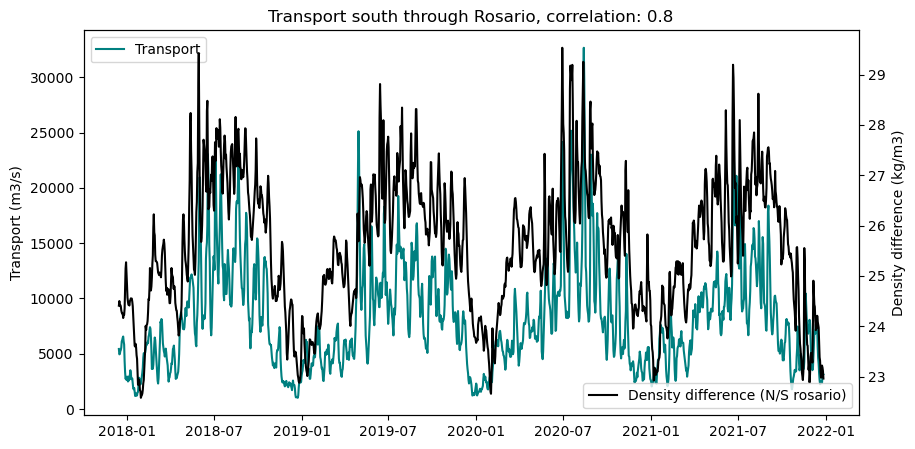

In [128]:
# rostosouth = prtovs_ros_avg + prtoadm_ros_avg
date_rossh = list(rostosouth.dropna().index)

mask = np.isin(datelist_dens,date_rossh)
densdiff_ros = dens_diff_ros[mask]
# densdiff_ros2 = dens_diff_rosVS[mask]
date_dens_sh = np.array(datelist_dens)[mask]

corr_rostosouth,p = stats.spearmanr(densdiff_ros,rostosouth.dropna())

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(rostosouth.dropna(),color='teal',label='Transport')
ax2=ax.twinx()
ax2.plot(date_dens_sh,densdiff_ros,color='k',label='Density difference (N/S rosario)')
ax.set_title(f'Transport south through Rosario, correlation: {np.round(corr_rostosouth,2)}')
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Density difference (kg/m3)')
ax.legend(loc=2)
ax2.legend()

Text(0.5, 1.0, 'corr = -0.085')

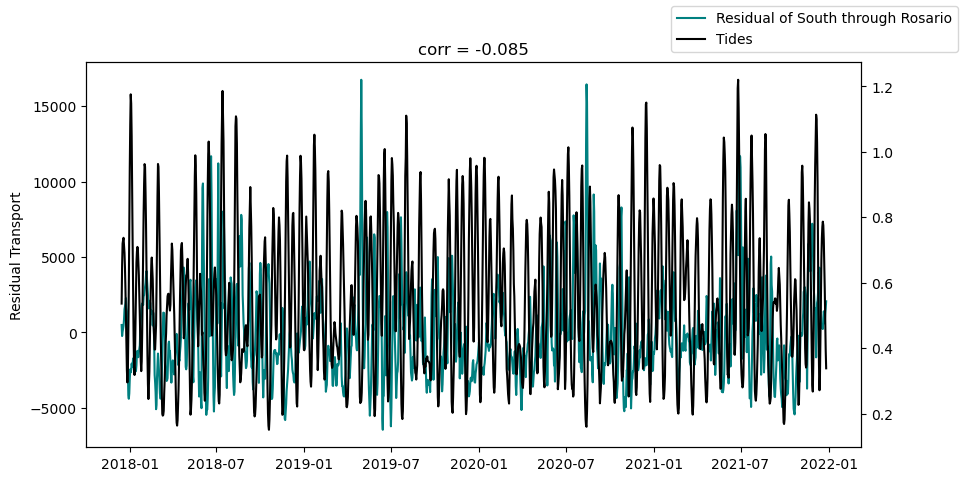

In [129]:
slope,intercept = np.polyfit(densdiff_ros,rostosouth,1)
ddline = slope*densdiff_ros+intercept
res = rostosouth - ddline.T

mask = np.isin(datelist_tides,date_rossh)
date_tides_sh = np.array(datelist_tides)[mask]
tides_sh = tides.vozocrtx[mask]

corr,p = stats.spearmanr(tides_sh,res)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res,color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_tides_sh,tides_sh,color='k',label='Tides')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'corr = {np.round(corr,3)}')

Text(0.5, 1.0, 'corr = -0.219')

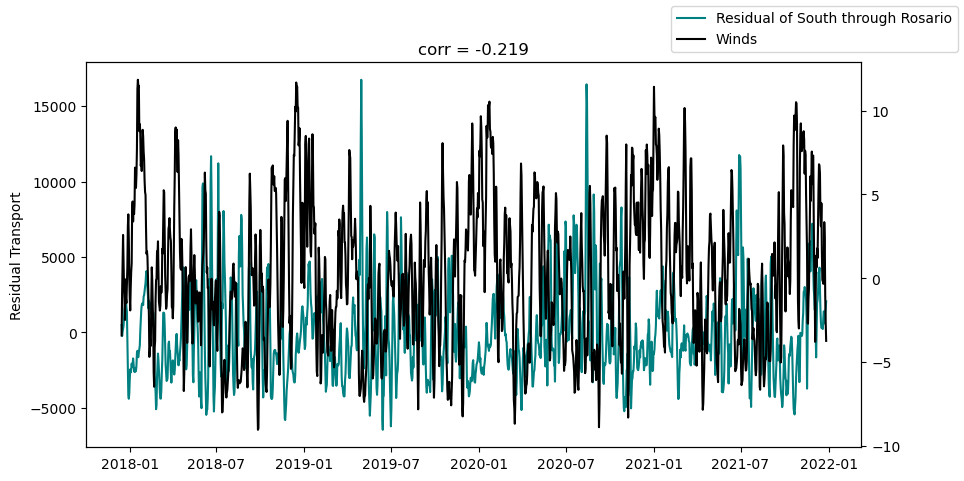

In [130]:
mask = np.isin(datelist_winds,date_rossh)
date_winds_sh = np.array(datelist_winds)[mask]
winds_sh = y_mean4[mask]

corr,p = stats.spearmanr(winds_sh,res)
corr

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res,color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_winds_sh,winds_sh,color='k',label='Winds')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'corr = {np.round(corr,3)}')

In [131]:
# Calculate correlations separately
idx = 379
idx_z1 = 20
idx_z2 = 110
idx_z3 = 230
idx_z4 = 379

ros2south_2018 = rostosouth_2018.dropna()
ros2south_2019 = rostosouth_2019.dropna()
winds_2018 = winds_sh[0:idx]
winds_2019 = winds_sh[idx:]
mask = np.isin(datelist_dens,date2018_rossh)
densdiff_ros_2018 = dens_diff_ros[mask]
densdiff_ros_2019 = densdiff_ros[idx:]
tides_2018 = tides_sh[0:idx]
tides_2019 = tides_sh[idx:750]
res_2018 = res[0:idx]
res_2019 = res[idx:750]
date_2018 = date_tides_sh[0:idx]
date_2019 = date_tides_sh[idx:750]

#Separate ddline for each year
##2018
slope,intercept = np.polyfit(densdiff_ros2018,rostosouth_2018.dropna()[0:379],1)
ddline2018 = slope*densdiff_ros2018+intercept
res2018 = rostosouth_2018.dropna()[0:379] - ddline2018
print(slope,intercept)

mask = np.isin(datelist_tides,date2018_rossh)
date_tides_2018sh = np.array(datelist_tides)[mask]
tides2018 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date2018_rossh)
date_winds_2018sh = np.array(datelist_winds)[mask]
winds2018 = y_mean4[mask]

## 2019
slope,intercept = np.polyfit(densdiff_ros2019,rostosouth_2019.dropna(),1)
ddline2019 = slope*densdiff_ros2019+intercept
res2019 = rostosouth_2019.dropna() - ddline2019

mask = np.isin(datelist_tides,date2019_rossh)
date_tides_2019sh = np.array(datelist_tides)[mask]
tides2019 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date2019_rossh)
date_winds_2019sh = np.array(datelist_winds)[mask]
winds2019 = y_mean4[mask]

##2020
mask = np.isin(datelist_dens,date2020_rossh)
densdiff_ros2020 = dens_diff_ros[mask]
slope,intercept = np.polyfit(densdiff_ros2020,rostosouth_2020.dropna()[0:379],1)
ddline2020 = slope*densdiff_ros2020+intercept
res2020 = rostosouth_2020.dropna()[0:379] - ddline2020
print(slope,intercept)

mask = np.isin(datelist_tides,date2020_rossh)
date_tides_2020sh = np.array(datelist_tides)[mask]
tides2020 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date2020_rossh)
date_winds_2020sh = np.array(datelist_winds)[mask]
winds2020 = y_mean4[mask]

##2021
mask = np.isin(datelist_dens,date2021_rossh)
densdiff_ros2021 = dens_diff_ros[mask]
slope,intercept = np.polyfit(densdiff_ros2021,rostosouth_2021.dropna()[0:379],1)
ddline2021 = slope*densdiff_ros2021+intercept
res2021 = rostosouth_2021.dropna()[0:379] - ddline2021
print(slope,intercept)

mask = np.isin(datelist_tides,date2021_rossh)
date_tides_2021sh = np.array(datelist_tides)[mask]
tides2021 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date2021_rossh)
date_winds_2021sh = np.array(datelist_winds)[mask]
winds2021 = y_mean4[mask]


2750.351224256408 -62426.847692377734
3291.641533543885 -76032.15002245392
2245.5746885373155 -49287.71525822874


(2245.5746885373155, -49287.71525822874)

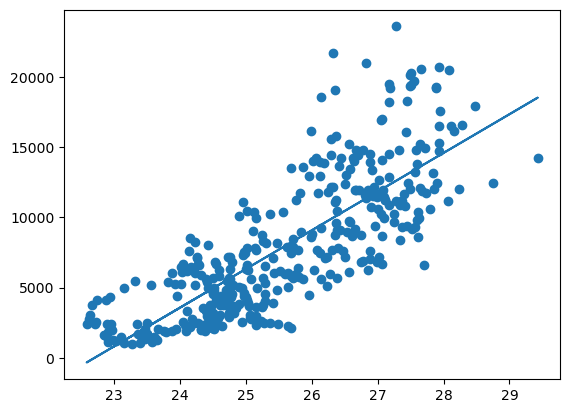

In [132]:
plt.scatter(densdiff_ros2018,rostosouth_2018.dropna()[0:379])
plt.plot(densdiff_ros2018,ddline2018)
slope,intercept

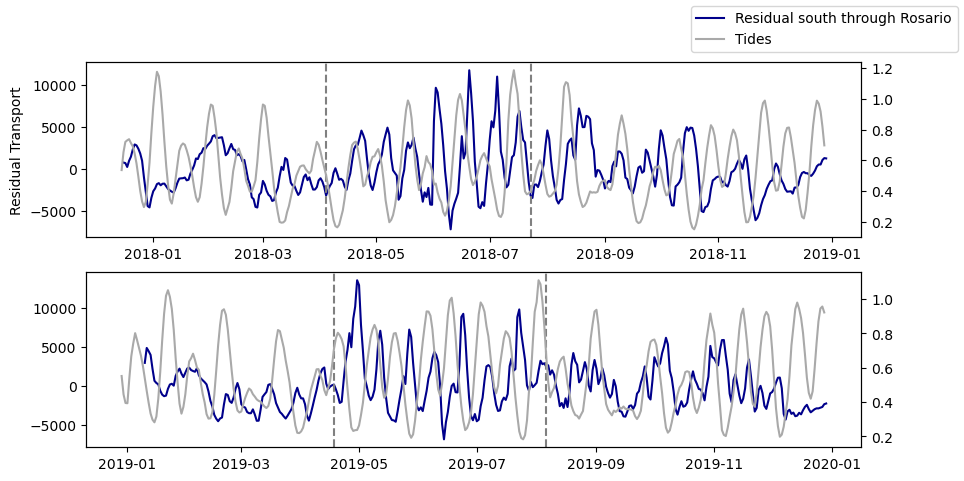

In [133]:
fig,ax = plt.subplots(2,1,figsize=(10,5))
ax2 = ax[0].twinx()
ax2.plot(date_2018,tides_2018,color='darkgrey',label='Tides')
ax[0].set_ylabel('Residual Transport')
# ax.plot(rostosouth.dropna(),label='Transport south through Rosario')
ax[0].plot(res2018,label='Residual south through Rosario',color='darkblue')
ax[0].axvline(date_tides_sh[110],ls='--',color='grey')
ax[0].axvline(date_tides_sh[220],ls='--',color='grey')
# ax[0].axvline(date_tides_sh[300],ls='--',color='grey')
ax3 = ax[1].twinx()
ax3.plot(date_2019[:365],tides_2019[:365],color='darkgrey')
ax[1].plot(res2019,color='darkblue')
ax[1].axvline(date_2019[110],ls='--',color='grey')
ax[1].axvline(date_2019[220],ls='--',color='grey')
# ax[1].axvline(date_2019[300],ls='--',color='grey')
fig.legend()

In [134]:
print('Correlations of residual rosS and tides')
corr,p = stats.spearmanr(tides_2018[110:240],res_2018[110:240])
print('2018:',corr)
corr,p = stats.spearmanr(tides_2019[110:240],res_2019[110:240])
print('2019:',corr)

Correlations of residual rosS and tides
2018: -0.057488153600349576
2019: -0.29959442297450467


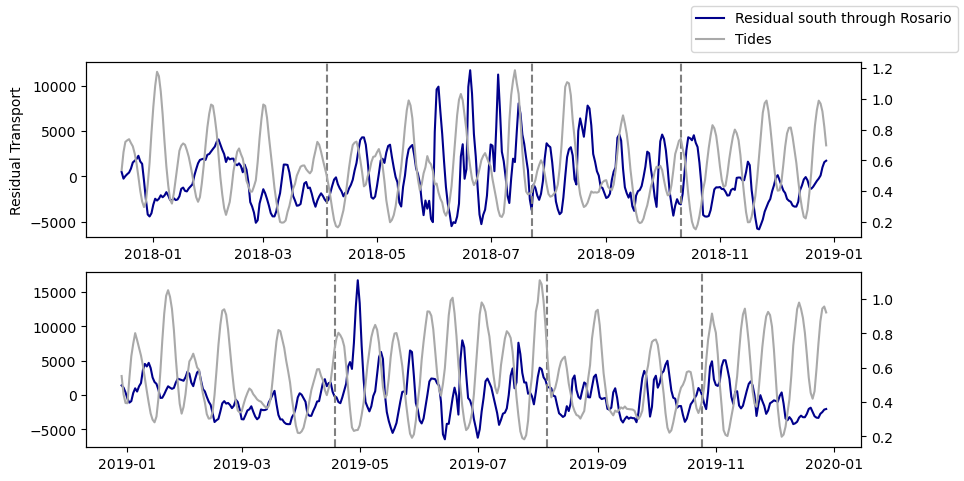

In [135]:
fig,ax = plt.subplots(2,1,figsize=(10,5))
ax2 = ax[0].twinx()
ax2.plot(date_2018,tides_2018,color='darkgrey',label='Tides')
ax[0].set_ylabel('Residual Transport')
# ax.plot(rostosouth.dropna(),label='Transport south through Rosario')
ax[0].plot(res_2018,label='Residual south through Rosario',color='darkblue')
ax[0].axvline(date_tides_sh[110],ls='--',color='grey')
ax[0].axvline(date_tides_sh[220],ls='--',color='grey')
ax[0].axvline(date_tides_sh[300],ls='--',color='grey')
ax3 = ax[1].twinx()
ax3.plot(date_2019[:365],tides_2019[:365],color='darkgrey')
ax[1].plot(res_2019[:365],color='darkblue')
ax[1].axvline(date_2019[110],ls='--',color='grey')
ax[1].axvline(date_2019[220],ls='--',color='grey')
ax[1].axvline(date_2019[300],ls='--',color='grey')
fig.legend()

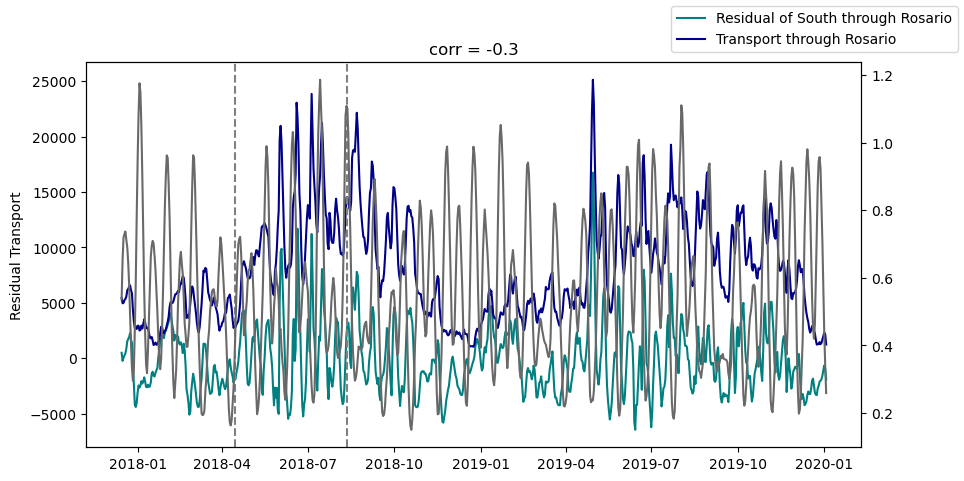

In [136]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res[:750],color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_tides_sh[:750],tides_sh[:750],color='dimgrey')
ax.plot(rostosouth.dropna()[:750],color='darkblue',label='Transport through Rosario')
# ax.plot(harotosouth.dropna(),color='sienna',label='Transport through Haro')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'corr = {np.round(corr,3)}')
ax.axvline(date_tides_sh[120],ls='--',color='grey')
ax.axvline(date_tides_sh[240],ls='--',color='grey')


### River Flow

In [137]:
# Import data and take mean

FR_data = pd.read_csv('/ocean/cstang/MOAD/analysis-camryn/Ariane/FR_discharge.csv')
FR_4mean = FR_data['Discharge (m3/s)'].rolling(window=4,center=True).mean()

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)

dates = []
datelist_FR = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_FR.append(date)
    date += dt.timedelta(days=1)

In [138]:
# Add all other runoff from climatology

rivers = xr.open_dataset('/data/SalishSeaCast/rivers-climatology/watershed_climatologies/Salish_allrivers_daily.nc')
clim = np.zeros(365)

for river in rivers.data_vars:
    clim += rivers[river][0:]
    
clim -= rivers['fraser']

date = dt.datetime(2020,1,1)
enddate = dt.datetime(2020,12,31)
dates = []
datelist_2020 = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_2020.append(date)
    date += dt.timedelta(days=1)

idx_leap = datelist_2020.index(dt.datetime(2020,2,29))

clim2020 = np.insert(clim,idx_leap,(clim[58]+clim[59])/2)

clim1718 = np.append(clim,clim)
clim1719 = np.append(clim1718,clim)
clim1720 = np.append(clim1719,clim2020)
clim1721 = np.append(clim1720,clim)
clim1722 = np.append(clim1721,clim)
len(clim1722)

date = dt.datetime(2017,1,1)
enddate = dt.datetime(2022,12,31)
datelist_yrs = []
dates = []

while date <= enddate:
    dates.append(date.strftime('%d%b%y').lower())
    datelist_yrs.append(date)
    date += dt.timedelta(days=1)
       
df_FR_4mean = pd.DataFrame(FR_4mean.values,index=datelist_FR)
df_clim = pd.DataFrame(clim1722,index=datelist_yrs)

runoff = df_FR_4mean.add(df_clim, fill_value=0)

In [139]:
mask = np.isin(datelist_FR,date_rossh)
runoff_ros = runoff[mask]
FR_4mean_ros = FR_4mean[mask]

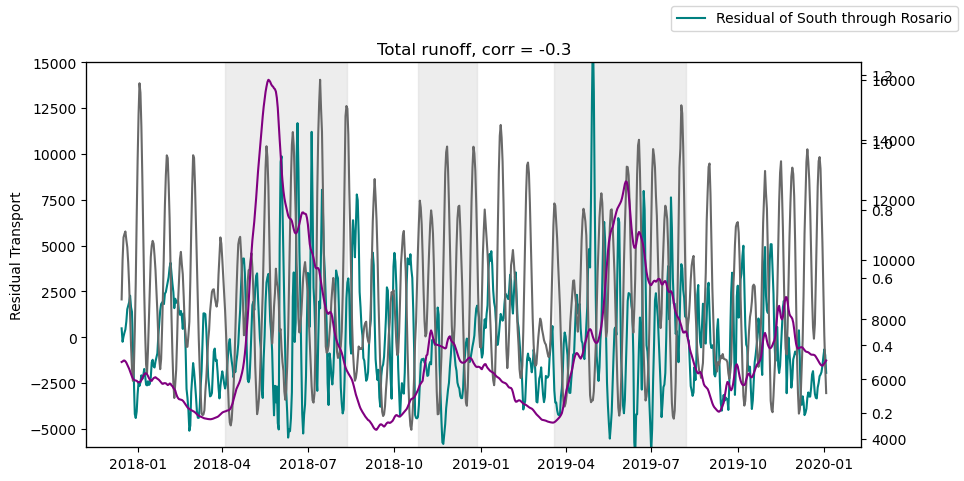

In [140]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res[:750],color='teal',label='Residual of South through Rosario')
ax2 = ax.twinx()
ax2.plot(date_tides_sh[:750],tides_sh[:750],color='dimgrey')
fig.legend()
ax.set_ylabel('Residual Transport')
ax.set_title(f'Total runoff, corr = {np.round(corr,3)}')
ax3 = ax.twinx()
ax3.plot(date_rossh[:750],runoff_ros[:750],color='purple')

ax.set_ylim([-6000,15000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_tides_sh[110],x2=date_tides_sh[240],color='lightgrey', alpha=0.4)

ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_tides_sh[315],x2=date_tides_sh[378],color='lightgrey', alpha=0.4)

ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_tides_sh[460],x2=date_tides_sh[600],color='lightgrey', alpha=0.4)


In [141]:
print('Correlations of 2018 with line of best fit through 18-21')
print(stats.spearmanr(tides_sh[:110],res[:110])[0])
print(stats.spearmanr(tides_sh[110:240],res[110:240])[0])
print(stats.spearmanr(tides_sh[240:379],res[240:379])[0])
print(stats.spearmanr(tides_sh[0:379],res[0:379])[0])

Correlations of 2018 with line of best fit through 18-21
-0.06566282713071704
-0.057488153600349576
-0.3034183833057777
-0.15787578003936842


Gets more negatively correlated later in the year

Text(0, 0.5, 'Fraser river flow (m3/s)')

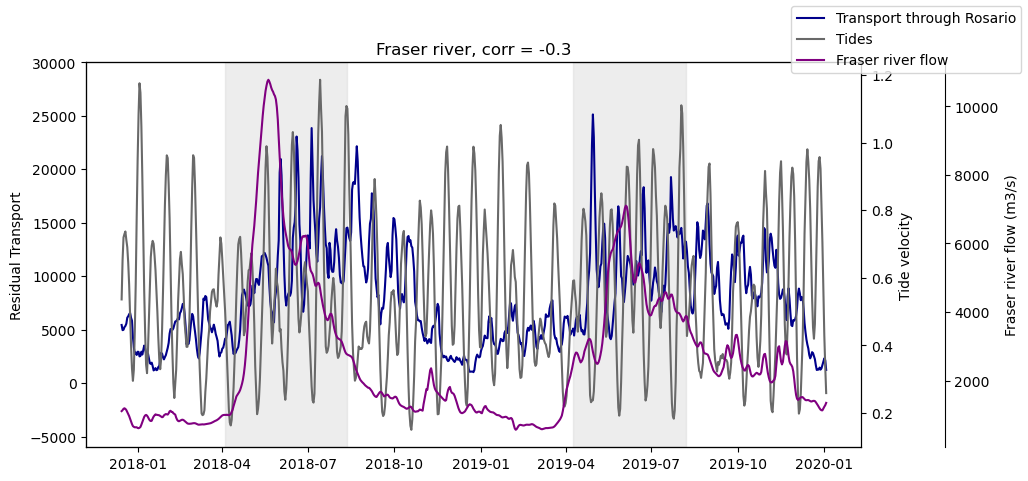

In [142]:
fig,ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax2.plot(date_tides_sh[:750],tides_sh[:750],color='dimgrey',label='Tides')
ax.plot(rostosouth.dropna()[:750],color='darkblue',label='Transport through Rosario')

ax.set_ylabel('Residual Transport')
ax.set_title(f'Fraser river, corr = {np.round(corr,3)}')
ax3 = ax.twinx()
ax3.plot(date_rossh[:750],FR_4mean_ros[:750],color='purple',label='Fraser river flow')

ax.set_ylim([-6000,30000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_tides_sh[110],x2=date_tides_sh[240],color='lightgrey', alpha=0.4)
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_tides_sh[480],x2=date_tides_sh[600],color='lightgrey', alpha=0.4)
ax3.spines['right'].set_position(('outward', 60))
fig.legend()
ax2.set_ylabel('Tide velocity')
ax3.set_ylabel('Fraser river flow (m3/s)')


## Flow to admiralty vs. to VicSill

0.7898050392182049


Text(0.5, 1.0, 'PR to adm, corr = 0.21')

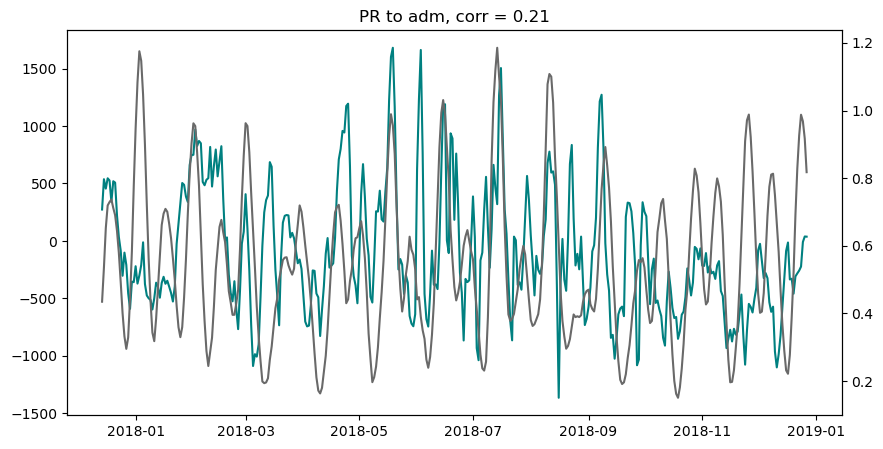

In [143]:
PRtoadm_ros_avg.dropna()
date_prtoadm = list(PRtoadm_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtoadm)
densdiff_prtoadm = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtoadm)
tides_prtoadm = tides.vozocrtx[mask]

corr,p = stats.spearmanr(densdiff_prtoadm,PRtoadm_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtoadm,PRtoadm_ros_avg.dropna(),1)
res_prtoadm = PRtoadm_ros_avg.dropna() - (slope*densdiff_prtoadm+intercept)

corr,p = stats.spearmanr(tides_prtoadm,res_prtoadm)
# print(stats.spearmanr(tides_prtoadm[110:240],PRtoadm_ros_avg.dropna()[110:240])[0])
# print(stats.spearmanr(tides_prtoadm[:110],PRtoadm_ros_avg.dropna()[:110])[0])
# print(stats.spearmanr(tides_prtoadm[240:379],PRtoadm_ros_avg.dropna()[240:379])[0])

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res_prtoadm[0:379],color='teal')
ax2 = ax.twinx()
ax2.plot(date_prtoadm[0:379],tides_prtoadm[0:379],color='dimgrey')
ax.set_title(f'PR to adm, corr = {np.round(corr,2)}')

0.773351192377872
Correlations of different times (best fit line 18-21)
-0.15437219396038987
0.06903549140367886
-0.2826454477830625
-0.3432101523749944


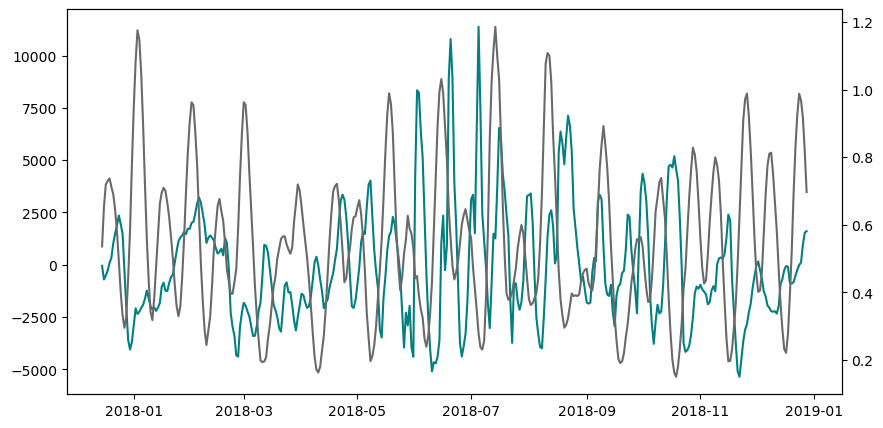

In [144]:
date_prtovs = list(prtovs_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtovs)
densdiff_prtovs = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtovs)
tides_prtovs = tides.vozocrtx[mask]

corr,p = stats.spearmanr(densdiff_prtovs,prtovs_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtovs,prtovs_ros_avg.dropna(),1)
res_prtovs = prtovs_ros_avg.dropna() - (slope*densdiff_prtovs+intercept)

print('Correlations of different times (best fit line 18-21)')
print(stats.spearmanr(tides_prtovs,prtovs_ros_avg.dropna())[0])
print(stats.spearmanr(tides_prtovs[110:240],prtovs_ros_avg.dropna()[110:240])[0])
print(stats.spearmanr(tides_prtovs[:110],prtovs_ros_avg.dropna()[:110])[0])
print(stats.spearmanr(tides_prtovs[240:379],prtovs_ros_avg.dropna()[240:379])[0])

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res_prtovs[0:379],color='teal')
ax2 = ax.twinx()
ax2.plot(date_prtovs[0:379],tides_prtovs[0:379],color='dimgrey')

0.7956335429603031
Correlations of different times (best fit line separate for each year) - PR to vs 2018
-0.18961034953258254
-0.16044190143249257
-0.07077519554583774
-0.30628267572277573


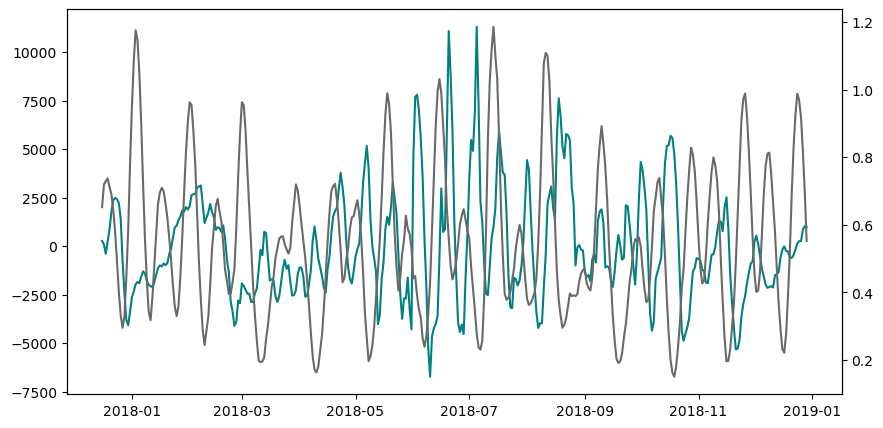

In [145]:
date_prtovs2018 = list(PRtovs2018_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtovs2018)
densdiff_prtovs2018 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtovs2018)
tides_prtovs2018 = tides.vozocrtx[mask]

corr,p = stats.spearmanr(densdiff_prtovs2018,PRtovs2018_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtovs2018,PRtovs2018_ros_avg.dropna(),1)
res_prtovs2018 = PRtovs2018_ros_avg.dropna() - (slope*densdiff_prtovs2018+intercept)

print('Correlations of different times (best fit line separate for each year) - PR to vs 2018')
print(stats.spearmanr(tides_prtovs2018,res_prtovs2018)[0])
print(stats.spearmanr(tides_prtovs2018[110:240],res_prtovs2018[110:240])[0])
print(stats.spearmanr(tides_prtovs2018[:110],res_prtovs2018[:110])[0])
print(stats.spearmanr(tides_prtovs2018[240:379],res_prtovs2018[240:379])[0])

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res_prtovs2018,color='teal')
ax2 = ax.twinx()
ax2.plot(date_prtovs2018[0:379],tides_prtovs2018[0:379],color='dimgrey')

0.6712197006069938
Correlations of different times (best fit line separate for each year) - PR to vs 2019
-0.1960055898138785
-0.3517977850305207
-0.08886234023848702
-0.1937899471316973


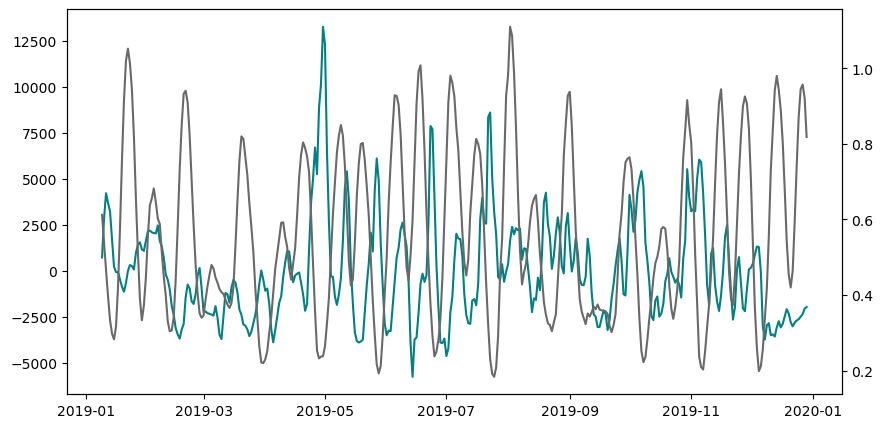

In [146]:
date_prtovs2019 = list(PRtovs2019_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtovs2019)
densdiff_prtovs2019 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtovs2019)
tides_prtovs2019 = tides.vozocrtx[mask]

corr,p = stats.spearmanr(densdiff_prtovs2019,PRtovs2019_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtovs2019,PRtovs2019_ros_avg.dropna(),1)
res_prtovs2019 = PRtovs2019_ros_avg.dropna() - (slope*densdiff_prtovs2019+intercept)

print('Correlations of different times (best fit line separate for each year) - PR to vs 2019')
print(stats.spearmanr(tides_prtovs2019,res_prtovs2019)[0])
print(stats.spearmanr(tides_prtovs2019[110:240],res_prtovs2019[110:240])[0])
print(stats.spearmanr(tides_prtovs2019[:110],res_prtovs2019[:110])[0])
print(stats.spearmanr(tides_prtovs2019[240:379],res_prtovs2019[240:379])[0])

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res_prtovs2019,color='teal')
ax2 = ax.twinx()
ax2.plot(date_prtovs2019[0:379],tides_prtovs2019[0:379],color='dimgrey')

In [147]:
mask = np.isin(datelist_winds,date_prtovs2018)
winds_prtovs2018 = y_mean4[mask]
mask = np.isin(datelist_winds,date_prtovs2019)
winds_prtovs2019 = y_mean4[mask]

date_prtovs2020 = list(PRtovs2020_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtovs2020)
densdiff_prtovs2020 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtovs2020)
tides_prtovs2020 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date_prtovs2020)
winds_prtovs2020 = y_mean4[mask]

corr,p = stats.spearmanr(densdiff_prtovs2020,PRtovs2020_ros_avg.dropna())
print(corr)

slope,intercept = np.polyfit(densdiff_prtovs2020,PRtovs2020_ros_avg.dropna(),1)
res_prtovs2020 = PRtovs2020_ros_avg.dropna() - (slope*densdiff_prtovs2020+intercept)

date_prtovs2021 = list(PRtovs2021_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtovs2021)
densdiff_prtovs2021 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtovs2021)
tides_prtovs2021 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date_prtovs2021)
winds_prtovs2021 = y_mean4[mask]

corr,p = stats.spearmanr(densdiff_prtovs2021,PRtovs2021_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtovs2021,PRtovs2021_ros_avg.dropna(),1)
res_prtovs2021 = PRtovs2021_ros_avg.dropna() - (slope*densdiff_prtovs2021+intercept)

0.749523475430906
0.7533198316076914


Look @ this for adm in 2019 and see if that correlation is stronger than 2018

0.828432932767059
Correlations of different times (best fit line separate for each year) - PR to adm 2018
0.33405802163537945
0.5629163309617775
0.17896445235894778
0.2820099200142991


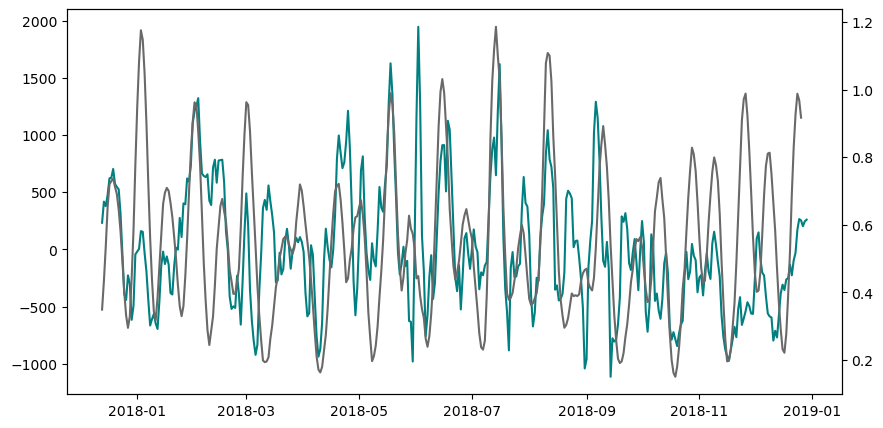

In [148]:
date_prtoadm2018 = list(PRtoadm2018_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtoadm2018)
densdiff_prtoadm2018 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtoadm2018)
tides_prtoadm2018 = tides.vozocrtx[mask]

corr,p = stats.spearmanr(densdiff_prtoadm2018,PRtoadm2018_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtoadm2018,PRtoadm2018_ros_avg.dropna(),1)
res_prtoadm2018 = PRtoadm2018_ros_avg.dropna() - (slope*densdiff_prtoadm2018+intercept)
print('Correlations of different times (best fit line separate for each year) - PR to adm 2018')
print(stats.spearmanr(tides_prtoadm2018,res_prtoadm2018)[0])
print(stats.spearmanr(tides_prtoadm2018[110:240],res_prtoadm2018[110:240])[0])
print(stats.spearmanr(tides_prtoadm2018[:110],res_prtoadm2018[:110])[0])
print(stats.spearmanr(tides_prtoadm2018[240:379],res_prtoadm2018[240:379])[0])

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res_prtoadm2018,color='teal')
ax2 = ax.twinx()
ax2.plot(date_prtoadm2018[0:379],tides_prtoadm2018[0:379],color='dimgrey')

0.692132571682073
Correlations of different times (best fit line separate for each year) - PR to vs 2019
-0.15347723736184815
-0.25645304455884965
-0.16283389310912244
-0.17858285575423746


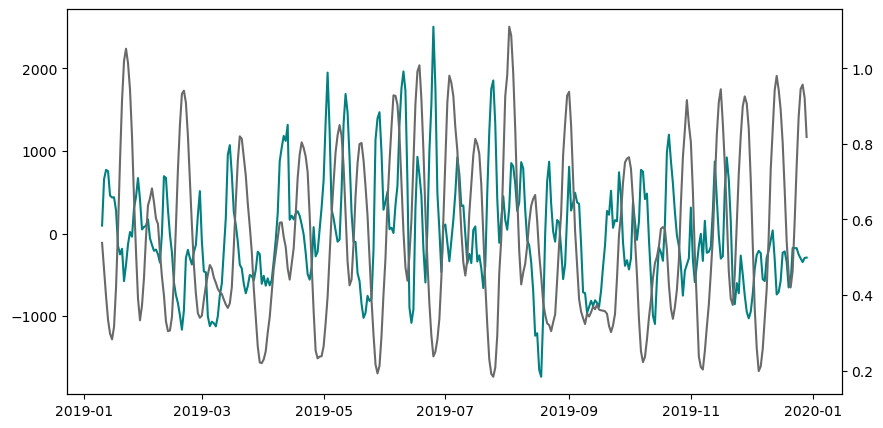

In [149]:
date_prtoadm2019 = list(PRtoadm2019_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtoadm2019)
densdiff_prtoadm2019 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtoadm2019)
tides_prtoadm2019 = tides.vozocrtx[mask]

corr,p = stats.spearmanr(densdiff_prtoadm2019,PRtoadm2019_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtoadm2019,PRtoadm2019_ros_avg.dropna(),1)
res_prtoadm2019 = PRtoadm2019_ros_avg.dropna() - (slope*densdiff_prtoadm2019+intercept)

print('Correlations of different times (best fit line separate for each year) - PR to vs 2019')
print(stats.spearmanr(tides_prtoadm2019,res_prtoadm2019)[0])
print(stats.spearmanr(tides_prtoadm2019[110:240],res_prtoadm2019[110:240])[0])
print(stats.spearmanr(tides_prtoadm2019[:110],res_prtoadm2019[:110])[0])
print(stats.spearmanr(tides_prtoadm2019[240:379],res_prtoadm2019[240:379])[0])

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res_prtoadm2019,color='teal')
ax2 = ax.twinx()
ax2.plot(date_prtoadm2019[0:379],tides_prtoadm2019[0:379],color='dimgrey')

In [150]:
mask = np.isin(datelist_winds,date_prtoadm2018)
winds_prtoadm2018 = y_mean4[mask]
mask = np.isin(datelist_winds,date_prtoadm2019)
winds_prtoadm2019 = y_mean4[mask]

date_prtoadm2020 = list(PRtoadm2020_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtoadm2020)
densdiff_prtoadm2020 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtoadm2020)
tides_prtoadm2020 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date_prtoadm2020)
winds_prtoadm2020 = y_mean4[mask]

corr,p = stats.spearmanr(densdiff_prtoadm2020,PRtoadm2020_ros_avg.dropna())
print(corr)

slope,intercept = np.polyfit(densdiff_prtoadm2020,PRtoadm2020_ros_avg.dropna(),1)
res_prtoadm2020 = PRtoadm2020_ros_avg.dropna() - (slope*densdiff_prtoadm2020+intercept)

date_prtoadm2021 = list(PRtoadm2021_ros_avg.dropna().index)

mask = np.isin(datelist_dens,date_prtoadm2021)
densdiff_prtoadm2021 = dens_diff_ros[mask]

mask = np.isin(datelist_tides,date_prtoadm2021)
tides_prtoadm2021 = tides.vozocrtx[mask]

mask = np.isin(datelist_winds,date_prtoadm2021)
winds_prtoadm2021 = y_mean4[mask]

corr,p = stats.spearmanr(densdiff_prtoadm2021,PRtoadm2021_ros_avg.dropna())
print(corr)
slope,intercept = np.polyfit(densdiff_prtoadm2021,PRtoadm2021_ros_avg.dropna(),1)
res_prtoadm2021 = PRtoadm2021_ros_avg.dropna() - (slope*densdiff_prtoadm2021+intercept)

0.7469843479419691
0.7651535639708786


Text(0, 0.5, 'Tide velocity')

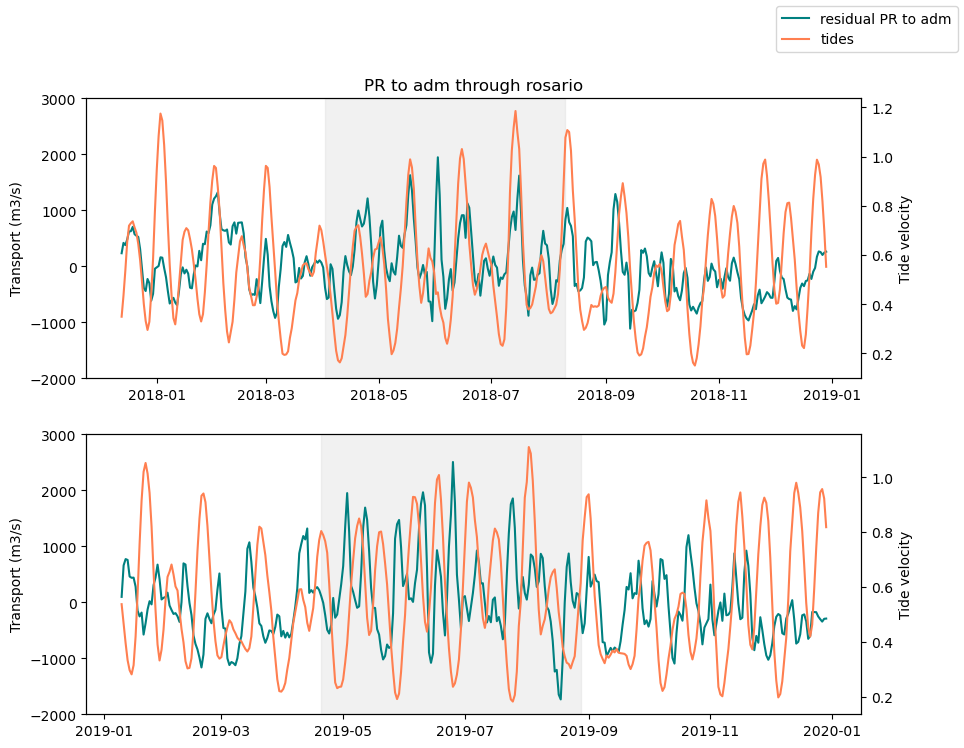

In [151]:
fig,[ax,ax4] = plt.subplots(2,1,figsize=(10,8))

ax.plot(res_prtoadm2018,color='teal',label='residual PR to adm')
ax2 = ax.twinx()
ax2.plot(date_prtoadm2018,tides_prtoadm2018,color='coral',label='tides')
ax.set_title(f'PR to adm through rosario')
ax.set_ylim([-2000,3000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2018[110],x2=date_prtoadm2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
fig.legend()

ax4.plot(res_prtoadm2019,color='teal')
ax42 = ax4.twinx()
ax42.plot(date_prtoadm2019[0:379],tides_prtoadm2019[0:379],color='coral')
ax4.set_ylim([-2000,3000])
ax4.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2019[100],x2=date_prtoadm2019[230],color='lightgrey', alpha=0.3)
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')

In [152]:
print('Correlations of tides with PRtoadm residual')
corr,p = stats.spearmanr(tides_prtoadm2018[110:240],res_prtoadm2018[110:240])
print('2018',corr)
corr,p = stats.spearmanr(tides_prtoadm2019[100:230],res_prtoadm2019[100:230])
print('2019',corr)

Correlations of tides with PRtoadm residual
2018 0.5629163309617775
2019 -0.22638845266219668


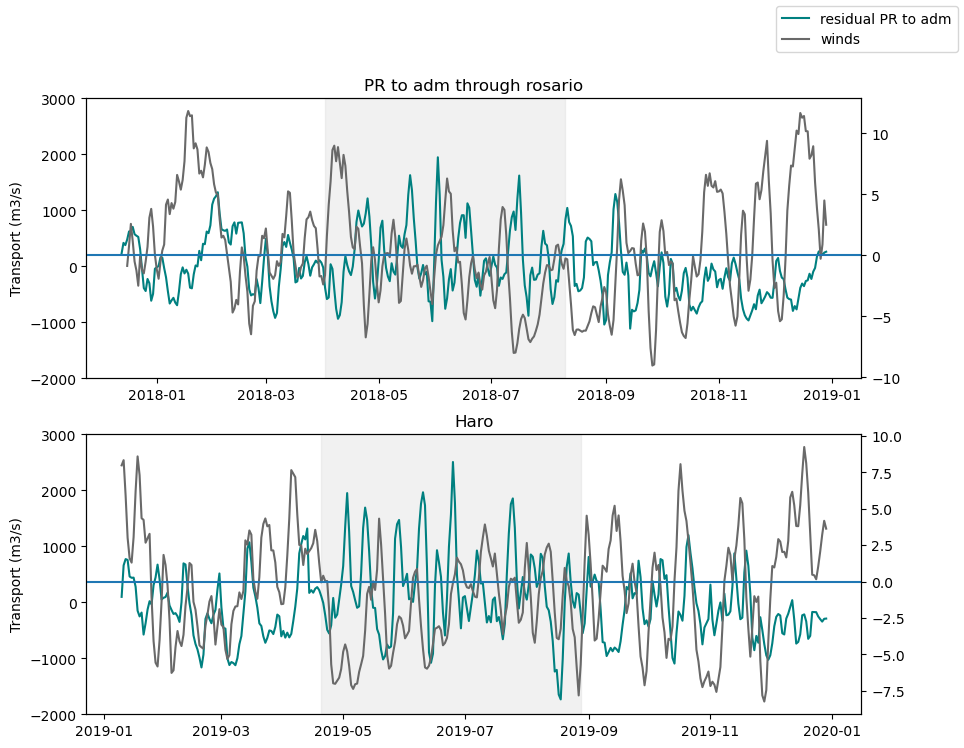

In [153]:
fig,[ax,ax4] = plt.subplots(2,1,figsize=(10,8))

ax.plot(res_prtoadm2018,color='teal',label='residual PR to adm')
ax3 = ax.twinx()
ax3.plot(date_winds_2018sh,winds2018,color='dimgrey',label='winds')
ax.set_title(f'PR to adm through rosario')
ax.set_ylim([-2000,3000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2018[110],x2=date_prtoadm2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
fig.legend()
ax4.plot(res_prtoadm2019,color='teal')
ax43 = ax4.twinx()
ax43.plot(date_winds_2019sh,winds2019,color='dimgrey')
ax4.set_title('Haro')
ax4.set_ylim([-2000,3000])
ax4.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2019[100],x2=date_prtoadm2019[230],color='lightgrey', alpha=0.3)
ax4.set_ylabel('Transport (m3/s)')
# ax42.set_ylabel('Tide velocity')
ax3.axhline(0)
ax43.axhline(0)

In [154]:
print('-- PR to adm res and winds --')
corr,p = stats.spearmanr(res_prtoadm2018[100:230],winds_prtoadm2018[100:230])
print('2018:',corr)
corr,p = stats.spearmanr(res_prtoadm2019[100:230],winds_prtoadm2019[100:230])
print('2019',corr)
corr,p = stats.spearmanr(res_prtoadm2020[100:230],winds_prtoadm2020[100:230])
print('2020',corr)
corr,p = stats.spearmanr(res_prtoadm2021[100:230],winds_prtoadm2021[100:230])
print('2021',corr)

print('-- PR to vs --')
corr,p = stats.spearmanr(res_prtovs2018[113:243],winds_prtovs2018[100:230])
print('2018:',corr)
corr,p = stats.spearmanr(res_prtovs2019[100:230],winds_prtovs2019[100:230])
print('2019',corr)
corr,p = stats.spearmanr(res_prtovs2020[100:230],winds_prtovs2020[100:230])
print('2020',corr)
corr,p = stats.spearmanr(res_prtovs2021[100:230],winds_prtovs2021[100:230])
print('2021',corr)

-- PR to adm res and winds --
2018: -0.2651272037034508
2019 -0.02935175954881263
2020 -0.2006117794862691
2021 -0.20182987614196563
-- PR to vs --
2018: 0.24862008220786846
2019 -0.3121195154924961
2020 -0.4040503079381119
2021 -0.3564789905638476


Stronger correlation for PR to vs but consistent signs through the years

#### Look at 2020 and 2021

-0.057488153600349576
-0.24475822420079474
-0.1524272518924925
-0.18715188554760742


Text(0, 0.5, 'Fraser river flow')

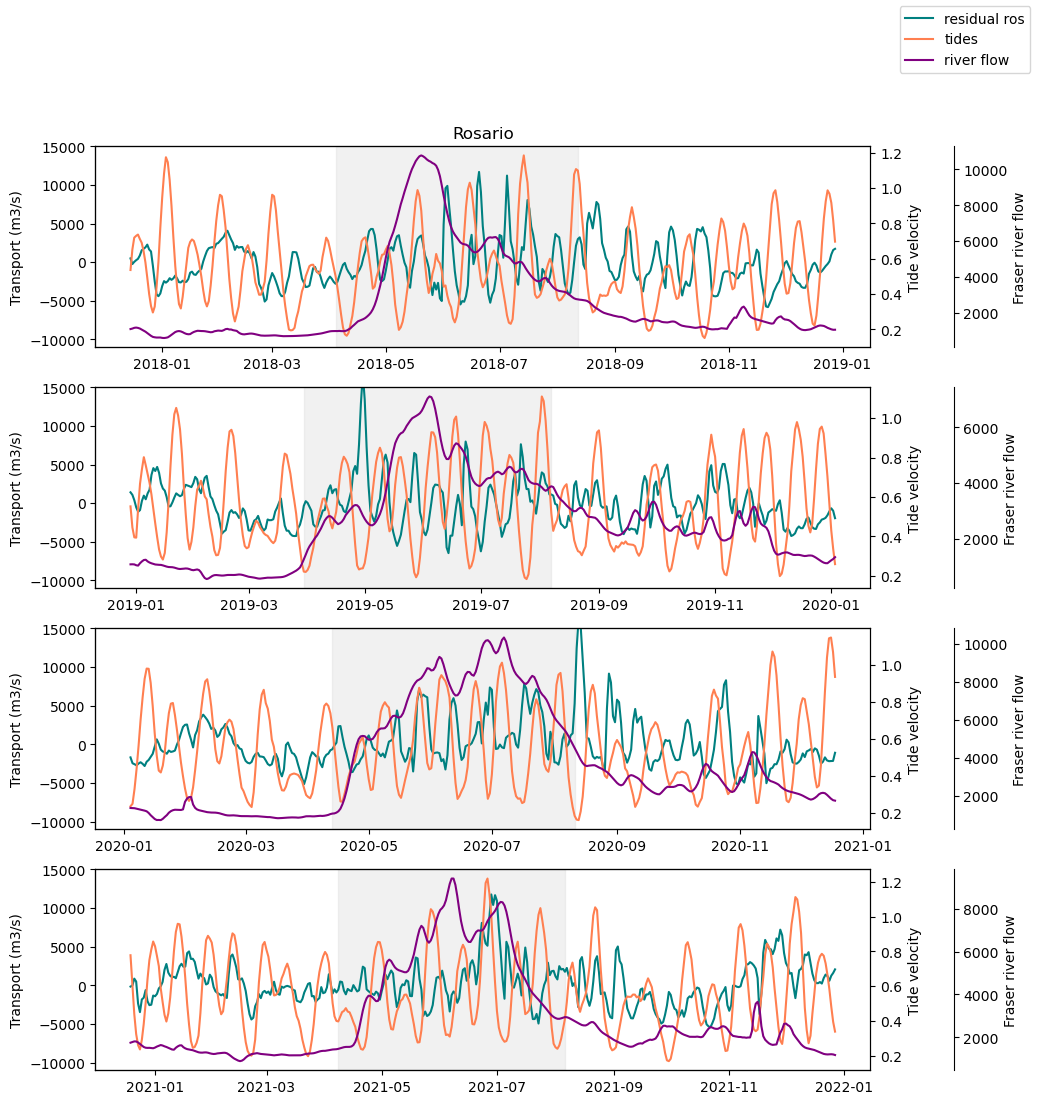

In [155]:
mask = np.isin(datelist_yrs,date_rossh)
FR_haro = FR_4mean[mask]

corr,p = stats.spearmanr(tides_sh[110:240],res[110:240])
print(corr)
corr,p = stats.spearmanr(tides_sh[470:600],res[470:600])
print(corr)
corr,p = stats.spearmanr(tides_sh[850:970],res[850:970])
print(corr)
corr,p = stats.spearmanr(tides_sh[1210:1330],res[1210:1330])
print(corr)

fig,[ax,ax4,ax5,ax6] = plt.subplots(4,1,figsize=(10,12))

ax.plot(res[0:379],color='teal',label='residual ros')
ax2 = ax.twinx()
ax2.plot(date_rossh[0:379],tides_sh[0:379],color='coral',label='tides')
ax3 = ax.twinx()
ax3.plot(date_rossh[0:379],FR_haro[0:379],color='purple',label='river flow')
ax.set_title('Rosario')
ax.set_ylim([-11000,15000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_rossh[110],x2=date_rossh[240],color='lightgrey', alpha=0.3)
ax3.spines['right'].set_position(('outward', 60))
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
ax3.set_ylabel('Fraser river flow')
fig.legend()

ax4.plot(res[379:750],color='teal')
ax42 = ax4.twinx()
ax42.plot(date_rossh[379:750],tides_sh[379:750],color='coral')
ax43 = ax4.twinx()
ax43.plot(date_rossh[379:750],FR_haro[379:750],color='purple')
ax4.set_ylim([-11000,15000])
ax4.fill_betweenx(y=np.linspace(ax4.get_ylim()[0], ax4.get_ylim()[1], 100),x1=date_rossh[470],x2=date_rossh[600],color='lightgrey', alpha=0.3)
ax43.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')
ax43.set_ylabel('Fraser river flow')

ax5.plot(res[750:1100],color='teal')
ax52 = ax5.twinx()
ax52.plot(date_rossh[750:1100],tides_sh[750:1100],color='coral')
ax53 = ax5.twinx()
ax53.plot(date_rossh[750:1100],FR_haro[750:1100],color='purple')
ax5.set_ylim([-11000,15000])
ax5.fill_betweenx(y=np.linspace(ax5.get_ylim()[0], ax5.get_ylim()[1], 100),x1=date_rossh[850],x2=date_rossh[970],color='lightgrey', alpha=0.3)
ax53.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Transport (m3/s)')
ax52.set_ylabel('Tide velocity')
ax53.set_ylabel('Fraser river flow')

ax6.plot(res[1100:],color='teal')
ax62 = ax6.twinx()
ax62.plot(date_rossh[1100:],tides_sh[1100:],color='coral')
ax63 = ax6.twinx()
ax63.plot(date_rossh[1100:],FR_haro[1100:],color='purple')
ax6.set_ylim([-11000,15000])
ax6.fill_betweenx(y=np.linspace(ax6.get_ylim()[0], ax6.get_ylim()[1], 100),x1=date_rossh[1210],x2=date_rossh[1330],color='lightgrey', alpha=0.3)
ax63.spines['right'].set_position(('outward', 60))
ax6.set_ylabel('Transport (m3/s)')
ax62.set_ylabel('Tide velocity')
ax63.set_ylabel('Fraser river flow')

Tides and PRtoadm residual
0.5510521787816303
-0.22638845266219668
0.1908560816070136
0.2840049707083259


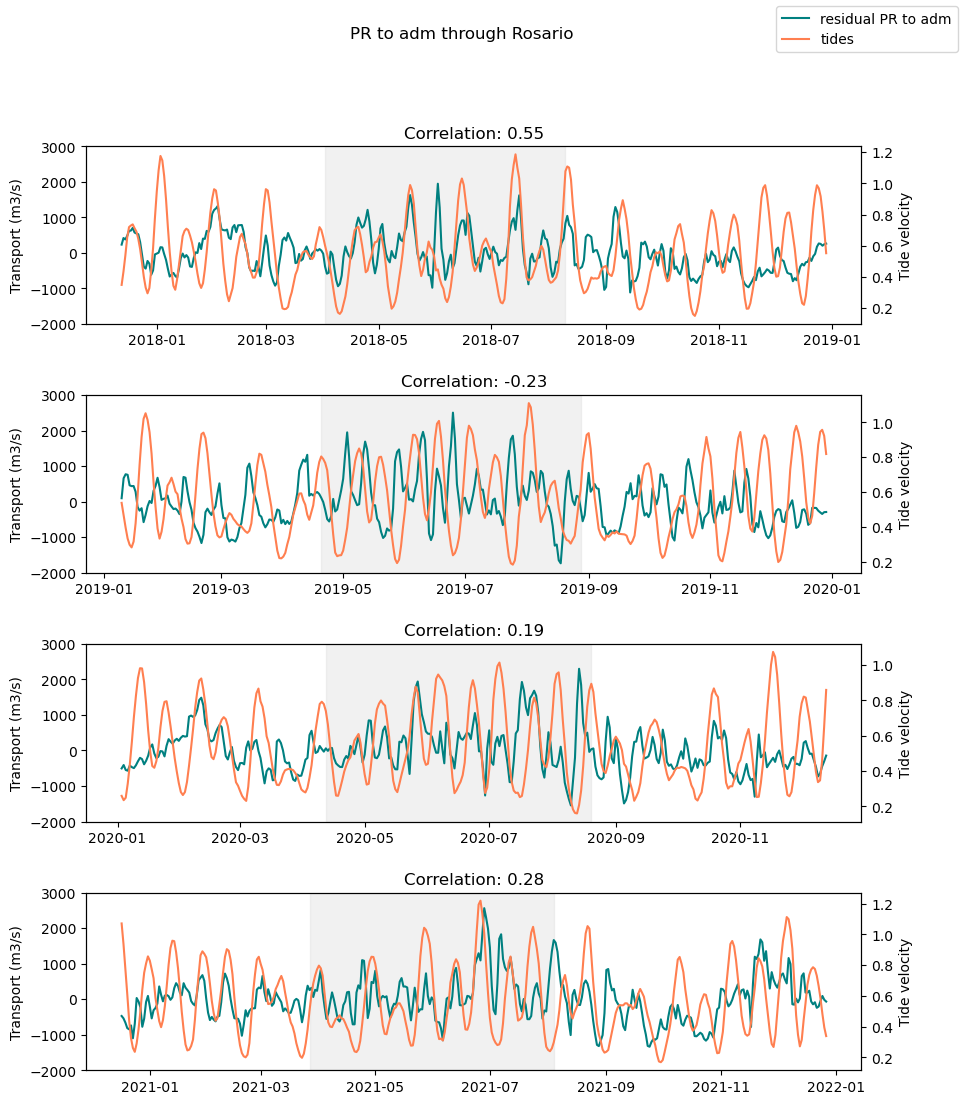

In [156]:
print('Tides and PRtoadm residual')
corr_2018,p = stats.spearmanr(tides_prtoadm2018[100:230],res_prtoadm2018[100:230])
print(corr_2018)
corr_2019,p = stats.spearmanr(tides_prtoadm2019[100:230],res_prtoadm2019[100:230])
print(corr_2019)
corr_2020,p = stats.spearmanr(tides_prtoadm2020[100:230],res_prtoadm2020[100:230])
print(corr_2020)
corr_2021,p = stats.spearmanr(tides_prtoadm2021[100:230],res_prtoadm2021[100:230])
print(corr_2021)

fig,[ax,ax4,ax5,ax6] = plt.subplots(4,1,figsize=(10,12))

ax.plot(res_prtoadm2018,color='teal',label='residual PR to adm')
ax2 = ax.twinx()
ax2.plot(date_prtoadm2018,tides_prtoadm2018,color='coral',label='tides')
ax.set_title(f'Correlation: {np.round(corr_2018,2)}')
ax.set_ylim([-2000,3000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2018[110],x2=date_prtoadm2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
fig.legend()
fig.suptitle('PR to adm through Rosario')

ax4.plot(res_prtoadm2019,color='teal')
ax42 = ax4.twinx()
ax42.plot(date_prtoadm2019[0:379],tides_prtoadm2019[0:379],color='coral')
ax4.set_ylim([-2000,3000])
ax4.set_title(f'Correlation: {np.round(corr_2019,2)}')
ax4.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2019[100],x2=date_prtoadm2019[230],color='lightgrey', alpha=0.3)
# ax43.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')

ax5.plot(res_prtoadm2020,color='teal')
ax52 = ax5.twinx()
ax52.plot(date_prtoadm2020,tides_prtoadm2020,color='coral')
ax5.set_ylim([-2000,3000])
ax5.set_title(f'Correlation: {np.round(corr_2020,2)}')
ax5.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2020[100],x2=date_prtoadm2020[230],color='lightgrey', alpha=0.3)
ax5.set_ylabel('Transport (m3/s)')
ax52.set_ylabel('Tide velocity')

ax6.plot(res_prtoadm2021,color='teal')
ax62 = ax6.twinx()
ax62.plot(date_prtoadm2021,tides_prtoadm2021,color='coral')
ax6.set_ylim([-2000,3000])
ax6.set_title(f'Correlation: {np.round(corr_2021,2)}')
ax6.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2021[100],x2=date_prtoadm2021[230],color='lightgrey', alpha=0.3)
ax6.set_ylabel('Transport (m3/s)')
ax62.set_ylabel('Tide velocity')

plt.subplots_adjust(hspace=0.4)

### Winds

Winds and PRtoadm residual
-0.2651272037034508
-0.02935175954881263
-0.2006117794862691
-0.20182987614196563


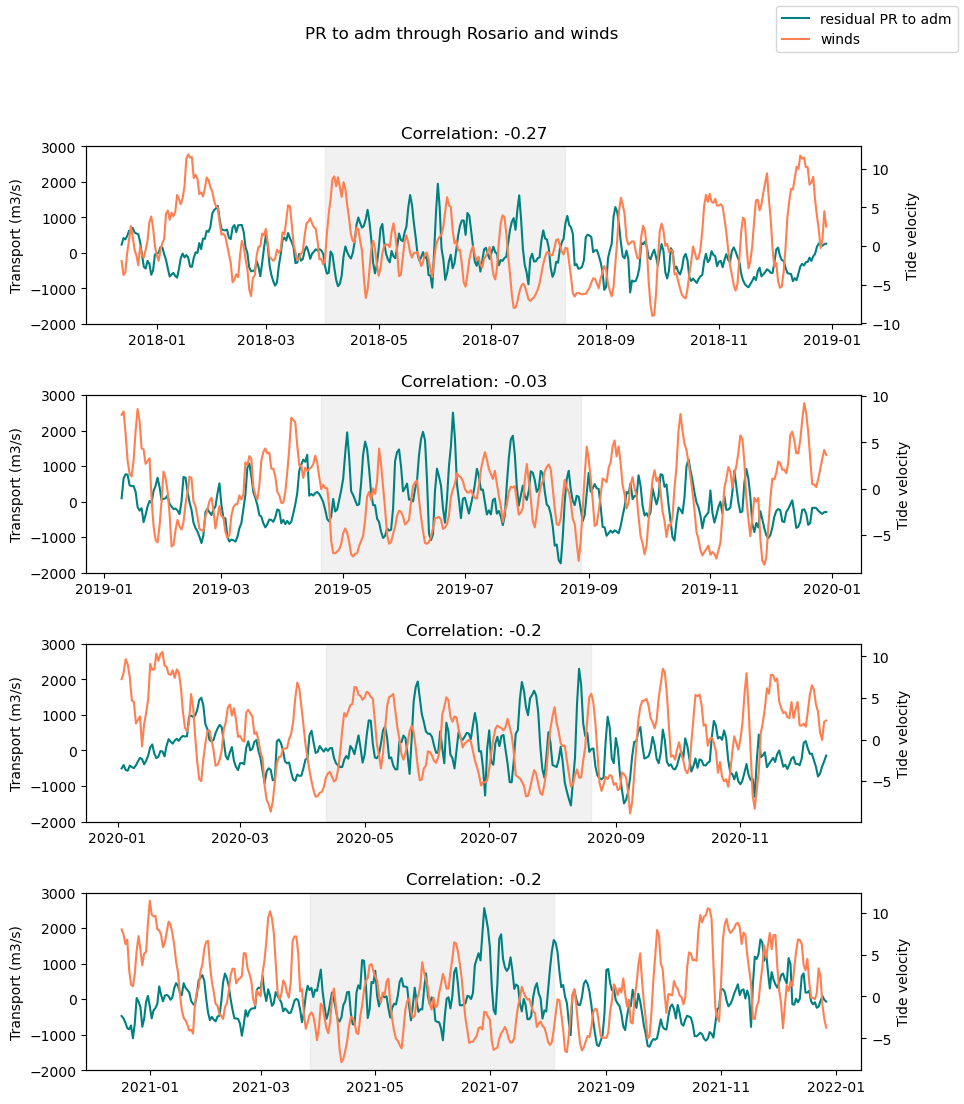

In [157]:
print('Winds and PRtoadm residual')
corr_2018,p = stats.spearmanr(winds_prtoadm2018[100:230],res_prtoadm2018[100:230])
print(corr_2018)
corr_2019,p = stats.spearmanr(winds_prtoadm2019[100:230],res_prtoadm2019[100:230])
print(corr_2019)
corr_2020,p = stats.spearmanr(winds_prtoadm2020[100:230],res_prtoadm2020[100:230])
print(corr_2020)
corr_2021,p = stats.spearmanr(winds_prtoadm2021[100:230],res_prtoadm2021[100:230])
print(corr_2021)

fig,[ax,ax4,ax5,ax6] = plt.subplots(4,1,figsize=(10,12))

ax.plot(res_prtoadm2018,color='teal',label='residual PR to adm')
ax2 = ax.twinx()
ax2.plot(date_prtoadm2018,winds_prtoadm2018,color='coral',label='winds')
ax.set_title(f'Correlation: {np.round(corr_2018,2)}')
ax.set_ylim([-2000,3000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2018[110],x2=date_prtoadm2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
fig.legend()
fig.suptitle('PR to adm through Rosario and winds')

ax4.plot(res_prtoadm2019,color='teal')
ax42 = ax4.twinx()
ax42.plot(date_prtoadm2019[0:379],winds_prtoadm2019[0:379],color='coral')
ax4.set_ylim([-2000,3000])
ax4.set_title(f'Correlation: {np.round(corr_2019,2)}')
ax4.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2019[100],x2=date_prtoadm2019[230],color='lightgrey', alpha=0.3)
# ax43.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')

ax5.plot(res_prtoadm2020,color='teal')
ax52 = ax5.twinx()
ax52.plot(date_prtoadm2020,winds_prtoadm2020,color='coral')
ax5.set_ylim([-2000,3000])
ax5.set_title(f'Correlation: {np.round(corr_2020,2)}')
ax5.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2020[100],x2=date_prtoadm2020[230],color='lightgrey', alpha=0.3)
ax5.set_ylabel('Transport (m3/s)')
ax52.set_ylabel('Tide velocity')

ax6.plot(res_prtoadm2021,color='teal')
ax62 = ax6.twinx()
ax62.plot(date_prtoadm2021,winds_prtoadm2021,color='coral')
ax6.set_ylim([-2000,3000])
ax6.set_title(f'Correlation: {np.round(corr_2021,2)}')
ax6.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtoadm2021[100],x2=date_prtoadm2021[230],color='lightgrey', alpha=0.3)
ax6.set_ylabel('Transport (m3/s)')
ax62.set_ylabel('Tide velocity')

plt.subplots_adjust(hspace=0.4)

Tides and PRtoVS residual
-0.1669365961572601
-0.43200644553387313
-0.28859877917218585
-0.2990864275082276


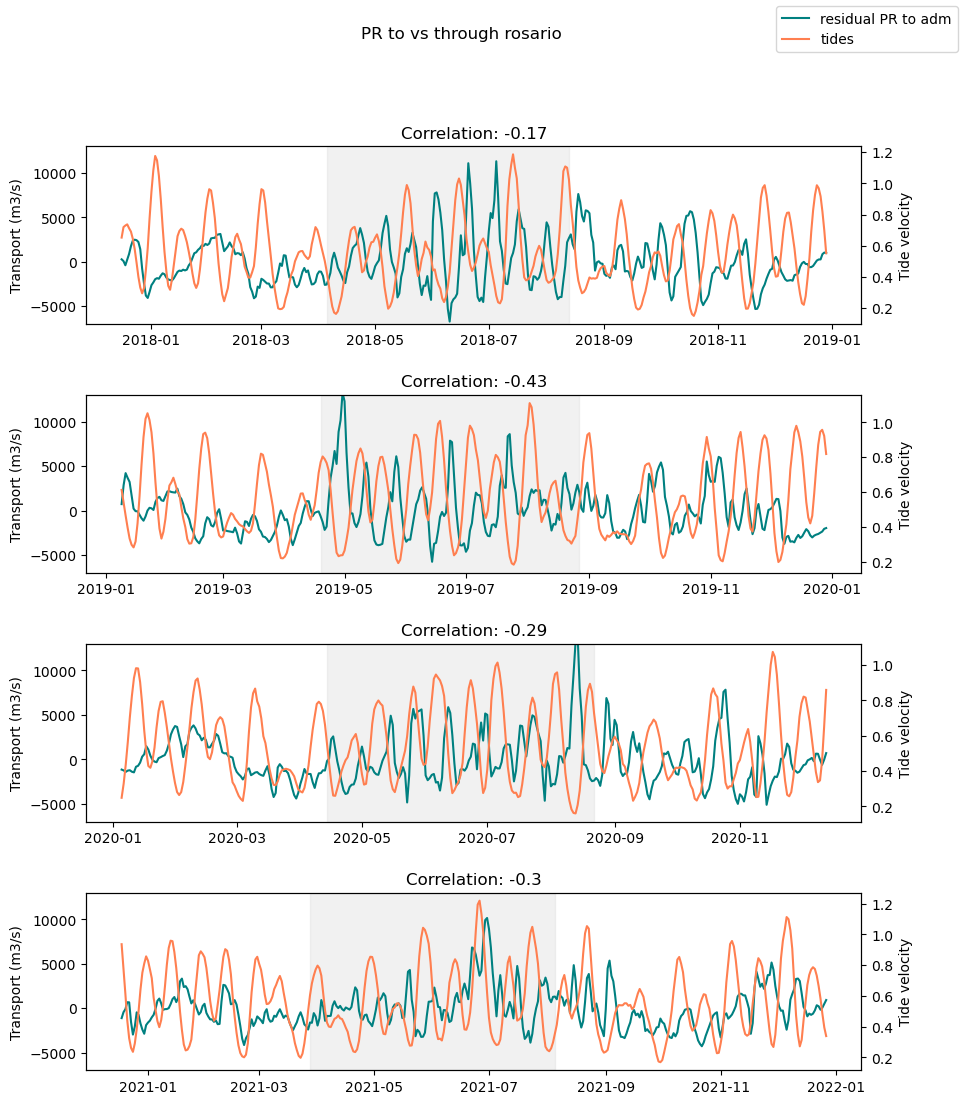

In [158]:
print('Tides and PRtoVS residual')
corr_2018,p = stats.spearmanr(tides_prtovs2018[100:230],res_prtovs2018[100:230])
print(corr_2018)
corr_2019,p = stats.spearmanr(tides_prtovs2019[100:230],res_prtovs2019[100:230])
print(corr_2019)
corr_2020,p = stats.spearmanr(tides_prtovs2020[100:230],res_prtovs2020[100:230])
print(corr_2020)
corr_2021,p = stats.spearmanr(tides_prtovs2021[100:230],res_prtovs2021[100:230])
print(corr_2021)

fig,[ax,ax4,ax5,ax6] = plt.subplots(4,1,figsize=(10,12))

ax.plot(res_prtovs2018,color='teal',label='residual PR to adm')
ax2 = ax.twinx()
ax2.plot(date_prtovs2018,tides_prtovs2018,color='coral',label='tides')
ax.set_title(f'Correlation: {np.round(corr_2018,2)}')
ax.set_ylim([-7000,13000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2018[110],x2=date_prtovs2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
fig.legend()
fig.suptitle('PR to vs through rosario')

ax4.plot(res_prtovs2019,color='teal')
ax42 = ax4.twinx()
ax42.plot(date_prtovs2019[0:379],tides_prtovs2019[0:379],color='coral')
ax4.set_ylim([-7000,13000])
ax4.set_title(f'Correlation: {np.round(corr_2019,2)}')
ax4.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2019[100],x2=date_prtovs2019[230],color='lightgrey', alpha=0.3)
# ax43.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')

ax5.plot(res_prtovs2020,color='teal')
ax52 = ax5.twinx()
ax52.plot(date_prtovs2020,tides_prtovs2020,color='coral')
ax5.set_ylim([-7000,13000])
ax5.set_title(f'Correlation: {np.round(corr_2020,2)}')
ax5.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2020[100],x2=date_prtovs2020[230],color='lightgrey', alpha=0.3)
ax5.set_ylabel('Transport (m3/s)')
ax52.set_ylabel('Tide velocity')

ax6.plot(res_prtovs2021,color='teal')
ax62 = ax6.twinx()
ax62.plot(date_prtovs2021,tides_prtovs2021,color='coral')
ax6.set_ylim([-7000,13000])
ax6.set_title(f'Correlation: {np.round(corr_2021,2)}')
ax6.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2021[100],x2=date_prtovs2021[230],color='lightgrey', alpha=0.3)
ax6.set_ylabel('Transport (m3/s)')
ax62.set_ylabel('Tide velocity')
plt.subplots_adjust(hspace=0.4)


### Winds

Winds and PRtoVS residual
-0.003569692339745815
-0.3121195154924961
-0.4040503079381119
-0.3564789905638476


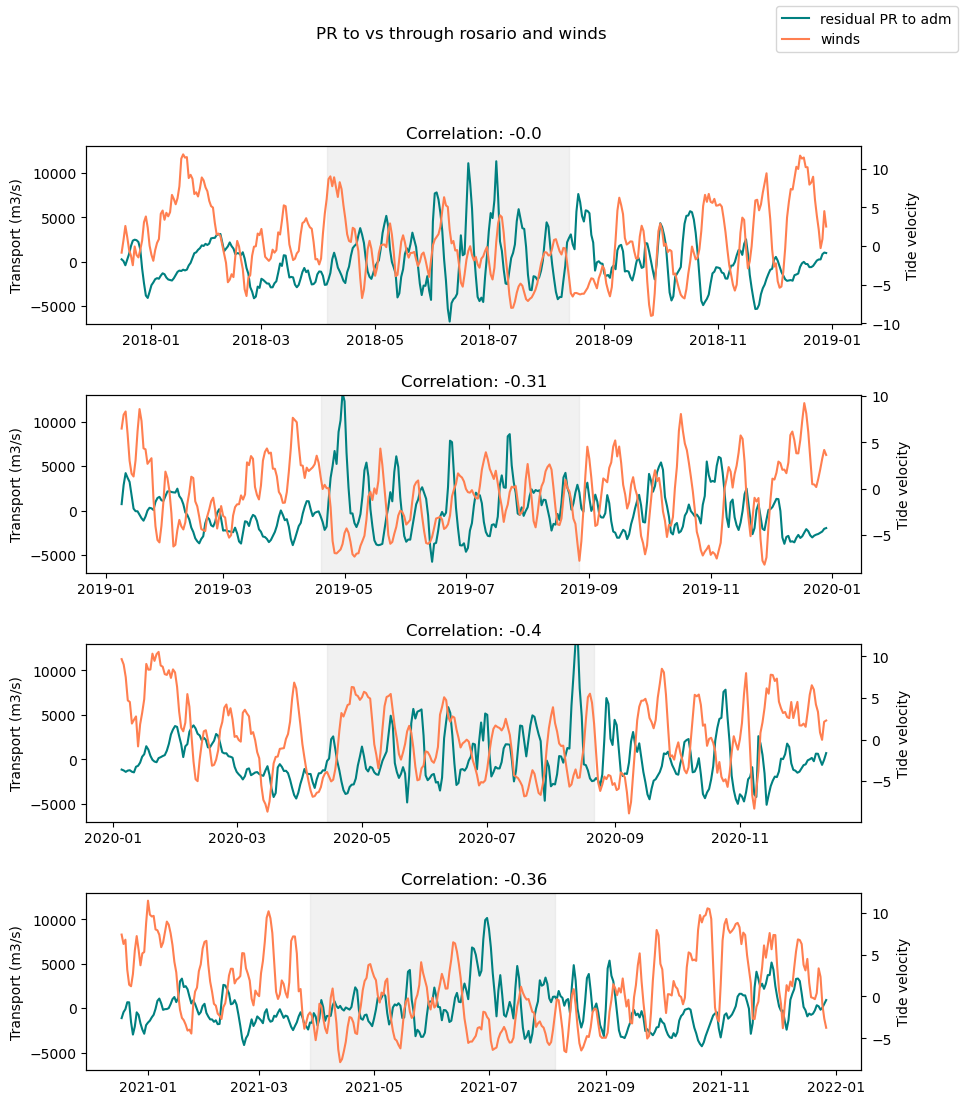

In [159]:
print('Winds and PRtoVS residual')
corr_2018,p = stats.spearmanr(winds_prtovs2018[110:230],res_prtovs2018[110:230])
print(corr_2018)
corr_2019,p = stats.spearmanr(winds_prtovs2019[100:230],res_prtovs2019[100:230])
print(corr_2019)
corr_2020,p = stats.spearmanr(winds_prtovs2020[100:230],res_prtovs2020[100:230])
print(corr_2020)
corr_2021,p = stats.spearmanr(winds_prtovs2021[100:230],res_prtovs2021[100:230])
print(corr_2021)

fig,[ax,ax4,ax5,ax6] = plt.subplots(4,1,figsize=(10,12))

ax.plot(res_prtovs2018,color='teal',label='residual PR to adm')
ax2 = ax.twinx()
ax2.plot(date_prtovs2018,winds_prtovs2018,color='coral',label='winds')
ax.set_title(f'Correlation: {np.round(corr_2018,2)}')
ax.set_ylim([-7000,13000])
ax.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2018[110],x2=date_prtovs2018[240],color='lightgrey', alpha=0.3)
ax.set_ylabel('Transport (m3/s)')
ax2.set_ylabel('Tide velocity')
fig.legend()
fig.suptitle('PR to vs through rosario and winds')

ax4.plot(res_prtovs2019,color='teal')
ax42 = ax4.twinx()
ax42.plot(date_prtovs2019[0:379],winds_prtovs2019[0:379],color='coral')
ax4.set_ylim([-7000,13000])
ax4.set_title(f'Correlation: {np.round(corr_2019,2)}')
ax4.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2019[100],x2=date_prtovs2019[230],color='lightgrey', alpha=0.3)
# ax43.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Transport (m3/s)')
ax42.set_ylabel('Tide velocity')

ax5.plot(res_prtovs2020,color='teal')
ax52 = ax5.twinx()
ax52.plot(date_prtovs2020,winds_prtovs2020,color='coral')
ax5.set_ylim([-7000,13000])
ax5.set_title(f'Correlation: {np.round(corr_2020,2)}')
ax5.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2020[100],x2=date_prtovs2020[230],color='lightgrey', alpha=0.3)
ax5.set_ylabel('Transport (m3/s)')
ax52.set_ylabel('Tide velocity')

ax6.plot(res_prtovs2021,color='teal')
ax62 = ax6.twinx()
ax62.plot(date_prtovs2021,winds_prtovs2021,color='coral')
ax6.set_ylim([-7000,13000])
ax6.set_title(f'Correlation: {np.round(corr_2021,2)}')
ax6.fill_betweenx(y=np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100),x1=date_prtovs2021[100],x2=date_prtovs2021[230],color='lightgrey', alpha=0.3)
ax6.set_ylabel('Transport (m3/s)')
ax62.set_ylabel('Tide velocity')
plt.subplots_adjust(hspace=0.4)

Correlation between PRtoVS and PRtoadm
2018 0.3084970561848773
2019 0.45139522978365704
2020 0.4029735251026598
2021 0.4634656957560587


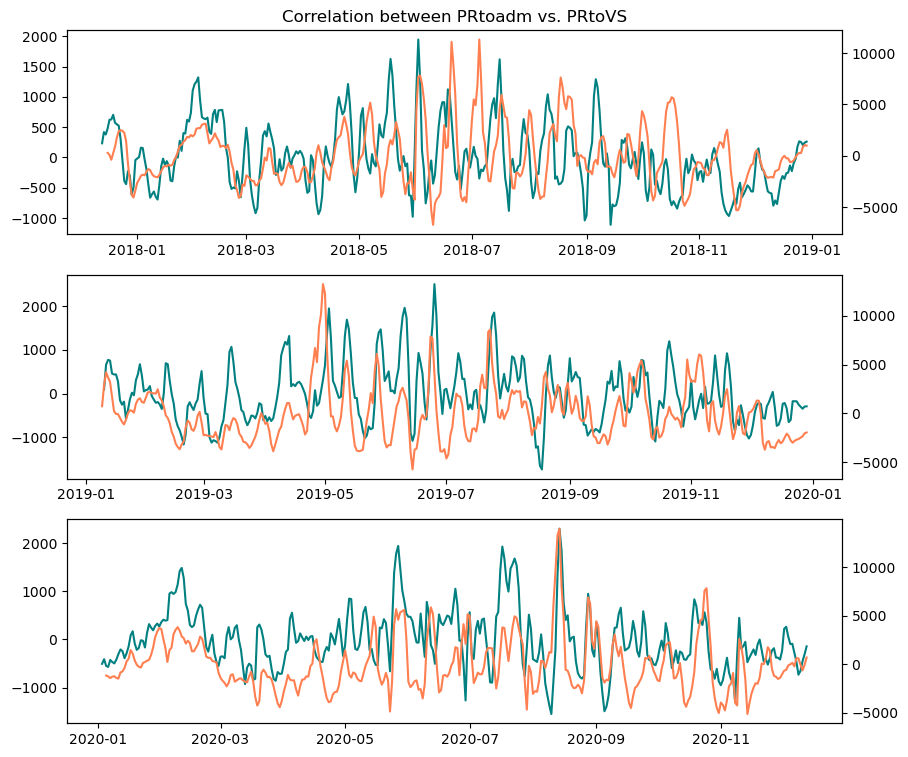

In [160]:
fig,[ax,ax3,ax4] = plt.subplots(3,1,figsize=(10,9))
ax.plot(res_prtoadm2018,color='teal')
ax2 = ax.twinx()
ax2.plot(res_prtovs2018,color='coral')
ax3.plot(res_prtoadm2019,color='teal')
ax32 = ax3.twinx()
ax32.plot(res_prtovs2019,color='coral')
ax4.plot(res_prtoadm2020,color='teal')
ax42 = ax4.twinx()
ax42.plot(res_prtovs2020,color='coral')
ax5.plot(res_prtoadm2021,color='teal')
ax52 = ax5.twinx()
ax52.plot(res_prtovs2021,color='coral')
ax.set_title('Correlation between PRtoadm vs. PRtoVS')
print('Correlation between PRtoVS and PRtoadm')
corr,p = stats.spearmanr(res_prtoadm2018[3:],res_prtovs2018)
print('2018',corr)
corr,p = stats.spearmanr(res_prtoadm2019,res_prtovs2019[1:])
print('2019',corr)
corr,p = stats.spearmanr(res_prtoadm2020[2:],res_prtovs2020)
print('2020',corr)
corr,p = stats.spearmanr(res_prtoadm2021[1:],res_prtovs2021)
print('2021',corr)

In [161]:
#Check timing of tides files
corr,p = stats.spearmanr(res_prtoadm2018[103:233],tides_prtovs2018[100:230])
print(corr)
corr,p = stats.spearmanr(res_prtoadm2018[103:233],tides_prtoadm2018[103:233])
print(corr)

0.5493697851943902
0.5493697851943902


In [162]:
print(res_prtoadm2018[103])
print(tides_prtoadm2018[103:104])
print(res_prtoadm2018[103])
print(tides_prtovs2018[100:101])

-19.47758189325782
449    0.514829
Name: vozocrtx, dtype: float64
-19.47758189325782
449    0.514829
Name: vozocrtx, dtype: float64


In [163]:
#Calculating cummulative river flow
print('Cummulative river flow in summer')
print('2018:',np.sum(FR_4mean_ros[0:379][100:230]))
print('2019:',np.sum(FR_4mean_ros[379:750][100:230]))
print('2020',np.sum(FR_4mean_ros[750:1100][100:230]))
print('2021',np.sum(FR_4mean_ros[1100:][100:230]))

Cummulative river flow in summer
2018: 664518.75
2019: 557805.0
2020 873045.0
2021 663500.0


In [164]:
#Calculating cummulative river flow 
print('Cummulative river flow')
print('2018:',np.sum(FR_4mean_ros[0:379]))
print('2019:',np.sum(FR_4mean_ros[379:750]))
print('2020',np.sum(FR_4mean_ros[750:1100]))
print('2021',np.sum(FR_4mean_ros[1100:]))

Cummulative river flow
2018: 1001117.5
2019: 970620.0
2020 1296828.5
2021 1099158.5


In [165]:
#Winds
print('Winds, upper quartile, lower quartile and mean')
## PR to adm
print('2018:',np.quantile(winds_prtoadm2018[100:230],0.75),np.quantile(winds_prtoadm2018[100:230],0.25),np.mean(winds_prtoadm2018[100:230]))
print('2019:',np.quantile(winds_prtoadm2019[100:230],0.75),np.quantile(winds_prtoadm2019[100:230],0.25),np.mean(winds_prtoadm2019[100:230]))
print('2020:',np.quantile(winds_prtoadm2020[100:230],0.75),np.quantile(winds_prtoadm2020[100:230],0.25),np.mean(winds_prtoadm2020[100:230]))
print('2021:',np.quantile(winds_prtoadm2021[100:230],0.75),np.quantile(winds_prtoadm2021[100:230],0.25),np.mean(winds_prtoadm2021[100:230]))

Winds, upper quartile, lower quartile and mean
2018: 1.5776111125000005 -2.85829895 -0.5241248029230765
2019: 0.23506100937500157 -4.100183593749999 -1.9308346635846139
2020: 2.2290240562500023 -3.849451631249998 -0.6108585080230746
2021: 0.19809349362500173 -4.129744118749999 -1.8068395448769212


In [166]:
#Tides
print('Tides, upper quartile, lower quartile and mean')
## PRtoadm
print('2018:',np.quantile(tides_prtoadm2018[100:230],0.75),np.quantile(tides_prtoadm2018[100:230],0.25),np.mean(tides_prtoadm2018[100:230]))
print('2019:',np.quantile(tides_prtoadm2019[100:230],0.75),np.quantile(tides_prtoadm2019[100:230],0.25),np.mean(tides_prtoadm2019[100:230]))
print('2020:',np.quantile(tides_prtoadm2020[100:230],0.75),np.quantile(tides_prtoadm2020[100:230],0.25),np.mean(tides_prtoadm2020[100:230]))
print('2021:',np.quantile(tides_prtoadm2021[100:230],0.75),np.quantile(tides_prtoadm2021[100:230],0.25),np.mean(tides_prtoadm2021[100:230]))

Tides, upper quartile, lower quartile and mean
2018: 0.6463933531194925 0.4006872866302728 0.5485176191880152
2019: 0.7728639803826809 0.39679097104817623 0.5837430886924266
2020: 0.7622436098754406 0.3757077483460307 0.5603270853941257
2021: 0.7695233300328255 0.39383466355502605 0.5792695242911577


Text(0.5, 1.0, 'Comparing tides in 2018 and 2019')

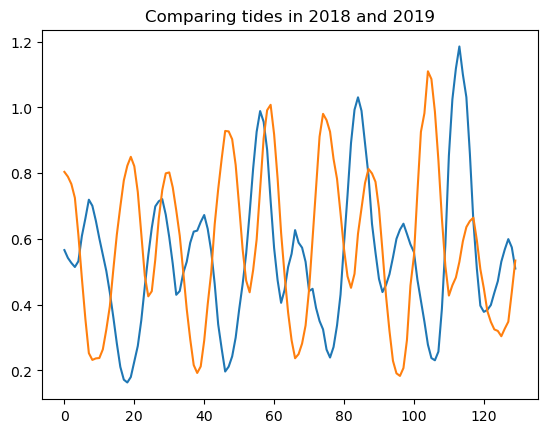

In [167]:
mask = np.isin(datelist_tides,datelist_vs)
tides18to21 = tides.vozocrtx[mask]


plt.plot(np.arange(0,130),tides_prtoadm2018[100:230])
plt.plot(np.arange(0,130),tides_prtoadm2019[100:230])
plt.title('Comparing tides in 2018 and 2019')
# plt.plot(np.arange(260,390),tides_prtoadm2020[100:230])
# plt.plot(np.arange(390,520),tides_prtoadm2021[100:230])

Text(0, 0.5, 'Wind (m/s)')

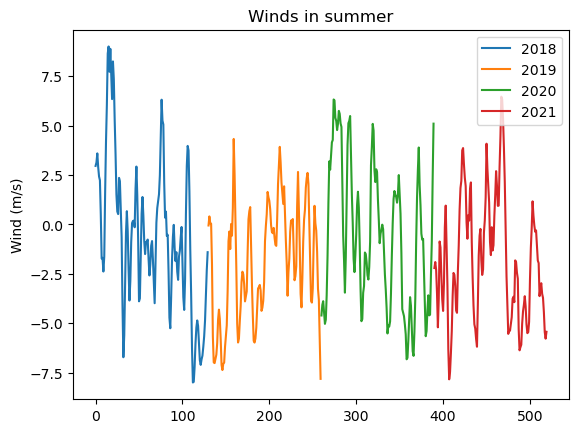

In [168]:
plt.plot(np.arange(0,130),winds_prtoadm2018[100:230],label='2018')
plt.plot(np.arange(130,260),winds_prtoadm2019[100:230],label='2019')
plt.plot(np.arange(260,390),winds_prtoadm2020[100:230],label='2020')
plt.plot(np.arange(390,520),winds_prtoadm2021[100:230],label='2021')
plt.title('Winds in summer')
plt.legend()
plt.ylabel('Wind (m/s)')

#### Look at differences in total transport through the years

In [169]:
print('Tides and residual')
corr,p = stats.spearmanr(tides2018[110:240],res2018[110:240])
print('2018:',corr)
corr,p = stats.spearmanr(tides2019[110:240],res2019[110:240])
print('2019:',corr)
corr,p = stats.spearmanr(tides2020[110:240],res2020[110:240])
print('2020',corr)
corr,p = stats.spearmanr(tides2021[110:240],res2021[110:240])
print('2021:',corr)

Tides and residual
2018: -0.06299963129361318
2019: -0.3488317469854839
2020 -0.26294227696677547
2021: -0.2082426361141078


Text(0.5, 1.0, 'Comparing residual in each year')

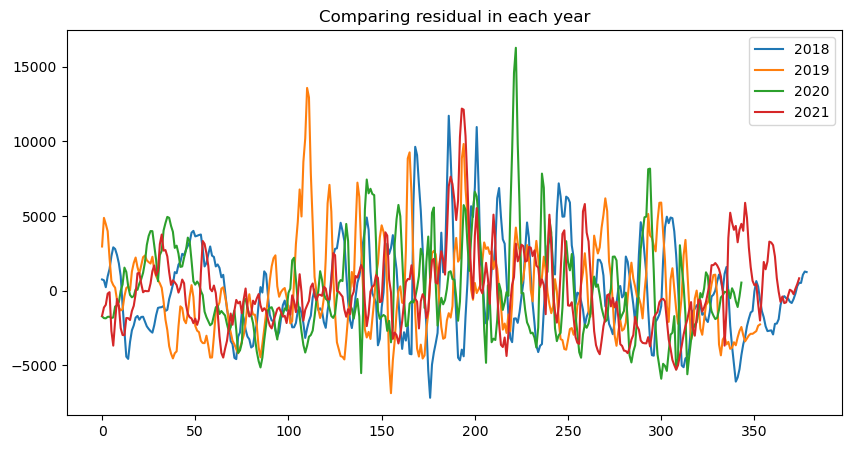

In [170]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(np.arange(0,len(res2018)),res2018,label='2018')
ax.plot(np.arange(0,len(res2019)),res2019,label='2019')
ax.plot(np.arange(0,len(res2020)),res2020,label='2020')
ax.plot(np.arange(0,len(res2021)),res2021,label='2021')
ax.legend()
ax.set_title('Comparing residual in each year')

No significant differences between years

Text(0.5, 1.0, 'Comparing residual in summer between years')

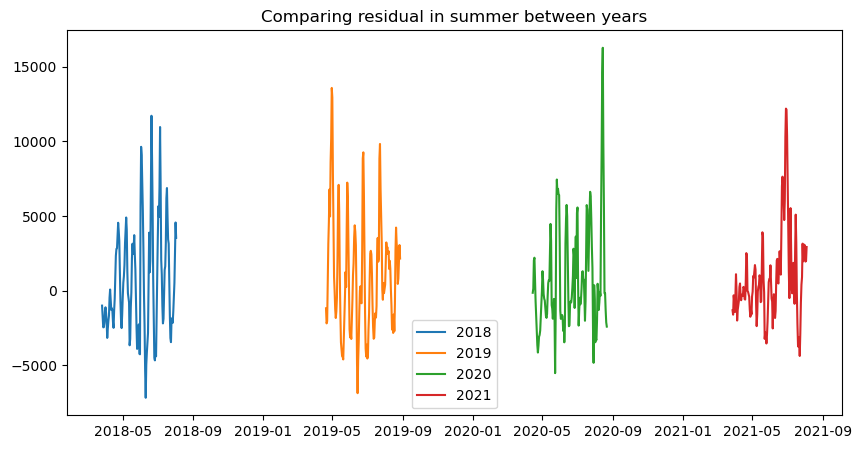

In [171]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(res2018[100:230],label='2018')
ax.plot(res2019[100:230],label='2019')
ax.plot(res2020[100:230],label='2020')
ax.plot(res2021[100:230],label='2021')
ax.legend()
ax.set_title('Comparing residual in summer between years')

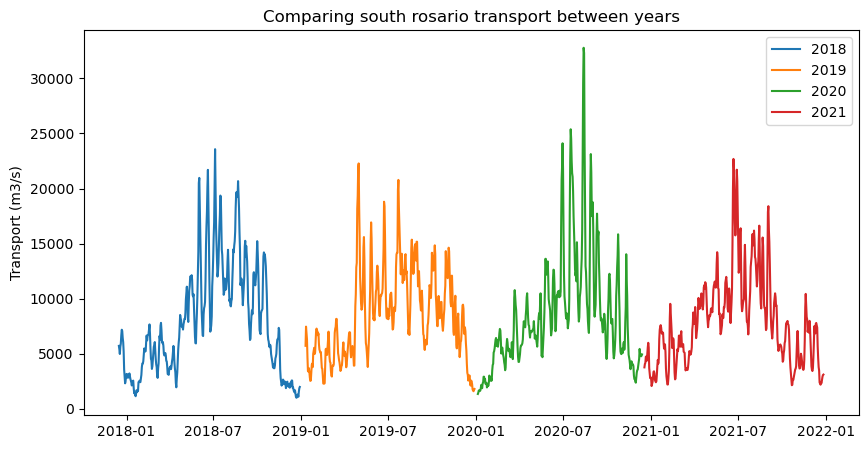

In [172]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(ros2south_2018,label='2018')
ax.plot(ros2south_2019,label='2019')
ax.plot(rostosouth_2020.dropna(),label='2020')
ax.plot(rostosouth_2021.dropna(),label='2021')
ax.set_title('Comparing south rosario transport between years')
ax.set_ylabel('Transport (m3/s)')
ax.legend()


No significant differences between years

In [173]:
np.sum(ros2south_2018),np.sum(ros2south_2019),np.sum(rostosouth_2020.dropna()),np.sum(rostosouth_2021.dropna())

(2976566.711133923, 3025380.251267982, 2933712.071648335, 2954738.562416996)

Total transport through each strait is pretty consistent between years

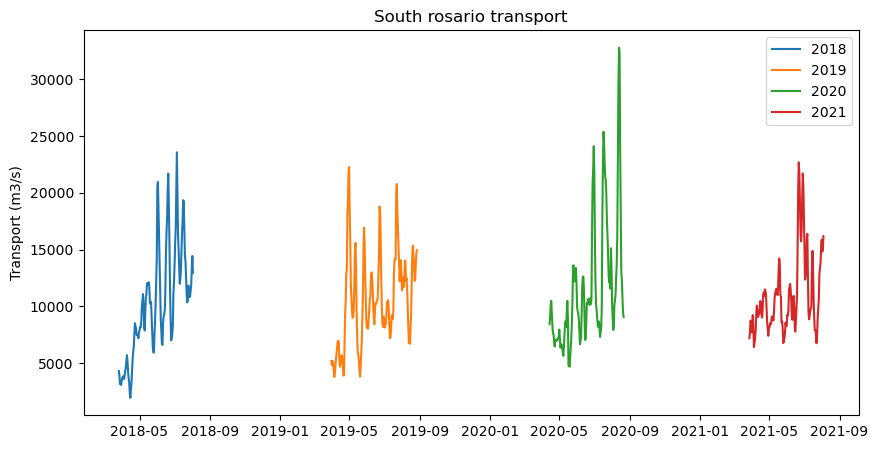

In [174]:
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(ros2south_2018[100:230],label='2018')
ax.plot(ros2south_2019[80:230],label='2019')
ax.plot(rostosouth_2020.dropna()[100:230],label='2020')
ax.plot(rostosouth_2021.dropna()[100:230],label='2021')
ax.set_title('South rosario transport')
ax.set_ylabel('Transport (m3/s)')
ax.legend()

Text(0.5, 1.0, 'Comparing difference in PRtoadm and PRtoVS for each year')

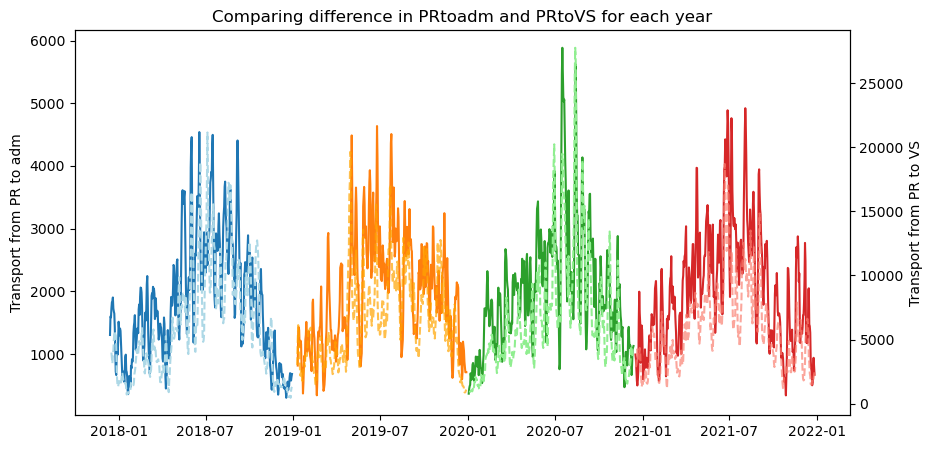

In [175]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(PRtoadm2018_ros_avg.dropna())
ax.plot(PRtoadm2019_ros_avg.dropna())
ax.plot(PRtoadm2020_ros_avg.dropna())
ax.plot(PRtoadm2021_ros_avg.dropna())
ax2 = ax.twinx()
ax2.plot(PRtovs2018_ros_avg.dropna(),color='lightblue',ls='--')
ax2.plot(PRtovs2019_ros_avg.dropna(),color='orange',ls='--',alpha=0.7)
ax2.plot(PRtovs2020_ros_avg.dropna(),color='lightgreen',ls='--')
ax2.plot(PRtovs2021_ros_avg.dropna(),color='salmon',ls='--',alpha=0.7)
ax.set_ylabel('Transport from PR to adm')
ax2.set_ylabel('Transport from PR to VS')
ax.set_title('Comparing difference in PRtoadm and PRtoVS for each year')

No significant differences

### Look at proportion of PRtoadm vs. PRtoVS

(0.2684121523271367,
 0.2469428228716954,
 0.2607129623691609,
 0.2703591533971429)

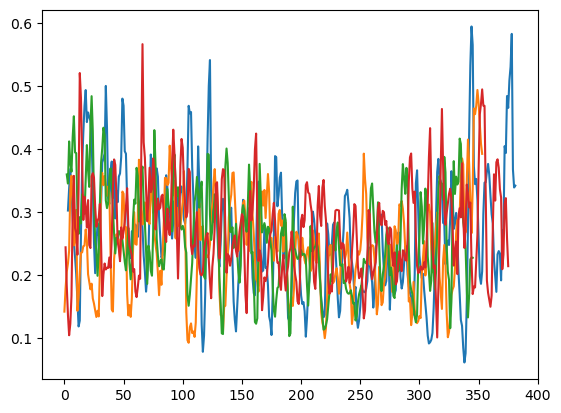

In [176]:
prop_adm_2018 = PRtoadm2018_ros_avg.dropna()/rostosouth_2018.dropna()
prop_adm_2019 = PRtoadm2019_ros_avg.dropna()/rostosouth_2019.dropna()
prop_adm_2020 = PRtoadm2020_ros_avg.dropna()/rostosouth_2020.dropna()
prop_adm_2021 = PRtoadm2021_ros_avg.dropna()/rostosouth_2021.dropna()

plt.plot(prop_adm_2018.values)
plt.plot(prop_adm_2019.values)
plt.plot(prop_adm_2020.values)
plt.plot(prop_adm_2021.values)
prop_adm_2018.mean(),prop_adm_2019.mean(),prop_adm_2020.mean(),prop_adm_2021.mean()

No significant differences

In [177]:
## Correlations

mask = np.isin(datelist_tides,date2018_rossh)
date_tides_2018sh = np.array(datelist_tides)[mask]
tides2018 = tides.vozocrtx[mask]

mask = np.isin(datelist_tides,date2019_rossh)
date_tides_2019sh = np.array(datelist_tides)[mask]
tides2019 = tides.vozocrtx[mask]

print('----- 2018 Correlations -----')

corr,p = stats.spearmanr(densdiff_ros_2018,ros2south_2018)
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2018,res2018)
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2018,res2018)
print('Winds and Ros:',corr)

print('    -- May - August region --    ')
corr,p = stats.spearmanr(densdiff_ros_2018[100:230],ros2south_2018[100:230])
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2018[100:230],res2018[100:230])
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2018[100:230],res2018[100:230])
print('Winds and Ros:',corr)

print('\n\n ----- 2019 Correlations -----')

corr,p = stats.spearmanr(densdiff_ros2019,ros2south_2019.dropna())
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2019,res2019)
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2019,res2019)
print('Winds and Ros:',corr)

print('    -- May - August region --    ')
corr,p = stats.spearmanr(densdiff_ros_2019[100:230],ros2south_2019[100:230])
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2019[100:230],res2019[100:230])
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2019[100:230],res2019[100:230])
print('Winds and Ros:',corr)

print('\n\n ----- 2020 Correlations -----')

corr,p = stats.spearmanr(densdiff_ros2020,rostosouth_2020.dropna())
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2020,res2020)
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2020,res2020)
print('Winds and Ros:',corr)

print('    -- May - August region --    ')
corr,p = stats.spearmanr(densdiff_ros2020[100:230],rostosouth_2020[100:230])
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2020[100:230],res2020[100:230])
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2020[100:230],res2020[100:230])
print('Winds and Ros:',corr)

print('\n\n ----- 2021 Correlations -----')

corr,p = stats.spearmanr(densdiff_ros2021,rostosouth_2021.dropna())
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2021,res2021)
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2021,res2021)
print('Winds and Ros:',corr)

print('    -- May - August region --    ')
corr,p = stats.spearmanr(densdiff_ros2021[100:230],rostosouth_2021[100:230])
print('Densdiff and Ros:',corr)
corr,p = stats.spearmanr(tides2021[100:230],res2021[100:230])
print('Tides and Ros:',corr)
corr,p = stats.spearmanr(winds2021[100:230],res2021[100:230])
print('Winds and Ros:',corr)

----- 2018 Correlations -----
Densdiff and Ros: 0.8292558573214036
Tides and Ros: -0.12447301190531297
Winds and Ros: -0.19575566003839853
    -- May - August region --    
Densdiff and Ros: 0.7014516107006786
Tides and Ros: -0.08490898414562537
Winds and Ros: -0.07430662715590818


 ----- 2019 Correlations -----
Densdiff and Ros: 0.7061271358887469
Tides and Ros: -0.2131397691377052
Winds and Ros: -0.2873803439062376
    -- May - August region --    
Densdiff and Ros: -0.16406887981537369
Tides and Ros: -0.44461347280449004
Winds and Ros: -0.28454027775881136


 ----- 2020 Correlations -----
Densdiff and Ros: 0.7759677148340195
Tides and Ros: -0.07695702287848549
Winds and Ros: -0.17338065661047025
    -- May - August region --    
Densdiff and Ros: 0.5052178781630228
Tides and Ros: -0.24380231875349928
Winds and Ros: -0.40899916699668165


 ----- 2021 Correlations -----
Densdiff and Ros: 0.7885384002730685
Tides and Ros: 0.03969643873023097
Winds and Ros: -0.2568187507111162
    -- M